# Skin Detection
### Bianchi Luca (4805748)

## Intro
Context
Teoria

## Obiettivi
- Esplorare il mondo della skin detection
- Comprendere le criticità del task
- Definire alcuni possibili ambiti applicativi

## Metodo/i

## Analisi esperimenti
- Pollicione
- Jacobs
- manSweatingCloseup
- gioconda
- BC

## Conclusioni


In [89]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv


In [90]:
outputs = []
FILE_DIR = './material/images'

## Normalized RGB

In [91]:
def normalized(rgb):

        norm=np.zeros_like(rgb,np.float32)

        r = rgb[:, :, 0]
        g = rgb[:, :, 1]
        b = rgb[:, :, 2]
        sum = rgb.sum(axis=2)

        norm[:,:,0]=r/sum
        norm[:,:,1]=g/sum
        norm[:,:,2]=b/sum
        return norm

In [107]:
def run_skin_analysis_norm():
    with os.scandir(FILE_DIR+"/skin/") as direct:
        mx = [0, 0]
        mn = [1000, 1000]
        for file in direct:
            plt.figure(figsize=(32, 8))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_array = normalized(np.asarray(skin_img))
            plt.subplot(1, 9, 1)
            plt.imshow(skin_img_array)
            plt.subplot(1, 9, 2)
            plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)
            plt.subplot(1, 9, 3)
            plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)
            plt.subplot(1, 9, 4)
            plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)
            plt.subplot(1, 9, 5)
            plt.imshow(skin_img)
            plt.subplot(1, 9, (6, 7))
            tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.min() > mx[0]:
                mx[0] = tmp_mx.max()
            if tmp_mn.min() < mn[0]:
                mn[0] = tmp_mn.min()
            plt.subplot(1, 9, (8, 9))
            tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).max(axis=1)
            tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.min() > mx[1]:
                mx[1] = tmp_mx.max()
            if tmp_mn.min() < mn[1]:
                mn[1] = tmp_mn.min()
        print(f"Massimi = {mx}, Minimi = {mn}")

In [93]:
def norm_analysis(img):
    img_array = np.asarray(img)
    img_array_norm = normalized(img_array)
    fig = plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi immagine normalizzata")
    ax = plt.subplot(1, 4, 1)
    ax.title.set_text("Immagine normalizzata")
    plt.imshow(img_array_norm)
    plt.colorbar(orientation="vertical")
    mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
    mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)
    mask_norm = mask_rg & mask_rb
    ax = plt.subplot(1, 4, 2)
    ax.title.set_text("Maschera su R'/G'")
    plt.imshow(mask_rg, cmap='gray')
    ax = plt.subplot(1, 4, 3)
    ax.title.set_text("Maschera su R'/B'")
    plt.imshow(mask_rb, cmap='gray')
    ax = plt.subplot(1, 4, 4)
    ax.title.set_text("Maschera combinata")
    plt.imshow(mask_norm, cmap='gray')
    return mask_norm

## HSV

In [94]:
def run_skin_analysis_hsv():
    with os.scandir(FILE_DIR+"/skin/") as direct:
        mx = [0, 0]
        mn = [1000, 1000]
        for file in direct:
            plt.figure(figsize=(32, 4))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_hsb = cv.cvtColor(skin_img, cv.COLOR_BGR2HSV)
            plt.figure(figsize=(32, 8))
            plt.subplot(1, 7, 1)
            plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 2)
            plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 3)
            plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, (4, 5))
            tmp_mx = (skin_img_hsb[:, :, 0]).max(axis=1)
            tmp_mn = (skin_img_hsb[:, :, 0]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.max() > mx[0]:
                mx[0] = tmp_mx.max()
            if tmp_mn.min() < mn[0]:
                mn[0] = tmp_mn.min()
            plt.subplot(1, 7, (6, 7))
            tmp_mx = (skin_img_hsb[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_hsb[:, :, 1]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.max() > mx[1]:
                mx[1] = tmp_mx.max()
            if tmp_mn.min() < mn[1]:
                mn[1] = tmp_mn.min()
        print(f"Massimi = {mx}, Minimi = {mn}")

In [95]:
def hsv_analysis(img):
    img_hsb = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    label = ["H", "S", "V"]
    cmaps = ["hsv", "Reds", "gray"]

    plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi spazio HSV")
    ax = plt.subplot(1, 5, 1)
    ax.title.set_text("Immagine HSV")
    plt.imshow(img_hsb, cmap='hsv')

    for elem in range(img_hsb.shape[2]):
        plt.subplot(1, 5, elem + 2)
        plt.imshow(img_hsb[:, :, elem], cmap=cmaps[elem])
        plt.colorbar(orientation='vertical')
        plt.title(label[elem])
    mask_hsv = cv.inRange(img_hsb[:,:,0], 50, 160) & cv.inRange(img_hsb[:, :, 1], 40, 200)
    ax = plt.subplot(1, 5, 5)
    ax.title.set_text("Maschera")
    plt.imshow(mask_hsv, cmap="gray")
    return mask_hsv

## YCrCb

In [96]:

def run_skin_analysis_ycbcr():    
    with os.scandir(FILE_DIR+"/skin/") as direct:
        mx = [0, 0]
        mn = [1000, 1000]
        for file in direct:
            plt.figure(figsize=(32, 4))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_ycbcr = cv.cvtColor(skin_img, cv.COLOR_RGB2YCrCb)
            plt.subplot(1, 2, 1)
            plt.imshow(skin_img_ycbcr)
            plt.subplot(1, 2, 2)
            plt.imshow(skin_img)
            plt.figure(figsize=(32, 8))
            plt.subplot(1, 7, 1)
            plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 2)
            plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 3)
            plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, (4, 5))
            tmp_mx = (skin_img_ycbcr[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_ycbcr[:, :, 1]).min(axis=1)
            plt.plot(tmp_mn)
            plt.plot(tmp_mx)
            if tmp_mx.max() > mx[0] :
                mx[0] = tmp_mx.max()
            if tmp_mn.min() < mn[0] :
                mn[0] = tmp_mn.min()
            plt.subplot(1, 7, (6, 7))
            tmp_mx = (skin_img_ycbcr[:, :, 2]).max(axis=1)
            tmp_mn = (skin_img_ycbcr[:, :, 2]).min(axis=1)
            plt.plot(tmp_mn)
            plt.plot(tmp_mx)
            if tmp_mx.max() > mx[1] :
                mx[1] = tmp_mx.max()
            if tmp_mn.min() < mn[1] :
                mn[1] = tmp_mn.min()
        print(f"Massimi = {mx}, Minimi = {mn}")


In [97]:
def ycbcr_analysis(img):
    img_ycbcr = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
    plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi spazio YCbCr")
    ax = plt.subplot(1, 5, 1)
    ax.title.set_text("Immagine in ycbcr")
    plt.imshow(img_ycbcr)
    ax = plt.subplot(1, 5, 2)
    ax.title.set_text("Luminanza")
    plt.imshow(img_ycbcr[:, : , 0], cmap='gray')
    plt.colorbar(orientation='vertical')
    ax = plt.subplot(1, 5, 3)
    ax.title.set_text("Crominanza blu")
    plt.imshow(img_ycbcr[:, :, 1], cmap='Greens')
    plt.colorbar(orientation='vertical')
    ax = plt.subplot(1, 5, 4)
    ax.title.set_text("Crominanza rosso")
    plt.imshow(img_ycbcr[:, :, 2], cmap='Reds')
    plt.colorbar(orientation='vertical')
    mask_ycrcb = cv.inRange(img_ycbcr[:, :, 1], 127, 187) & cv.inRange(img_ycbcr[:, :, 2], 73, 127)
    ax = plt.subplot(1, 5, 5)
    ax.title.set_text("Maschera")
    plt.imshow(mask_ycrcb, cmap="gray")
    return mask_ycrcb

Proviamo a filtrare sui canali Cr e Cb, dai quali possiamo estrarre ulteriore
informazione

Proviamo ora a combinare i tre filtri

In [98]:
def plot_masked(img, mask):
    plt.figure(figsize=(32, 8))
    plt.suptitle("Immagine mascherata")
    plt.imshow(cv.bitwise_or(img, img, mask=mask))

In [99]:
def run_analysis(img_name):
    img = np.asarray(plt.imread(FILE_DIR + img_name)).astype('uint8')
    plt.figure(figsize=(32, 8))
    plt.suptitle("Immagine originale")
    plt.imshow(img)

    mask = norm_analysis(img) & hsv_analysis(img) & ycbcr_analysis(img)
    plot_masked(img, mask)

## Analisi esperimenti

Cominciamo con l'analisi di un esperimento basilare, usando l'immagine di una mano su sfondo bianco

/tmp/ipykernel_11565/532778935.py:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
/tmp/ipykernel_11565/532778935.py:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)
/tmp/ipykernel_11565/532778935.py:11: RuntimeWarning: invalid value encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


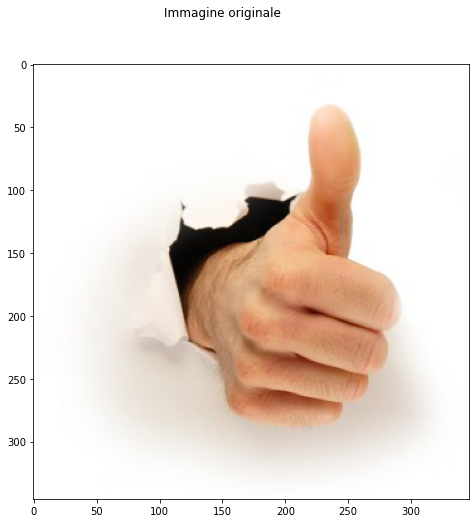

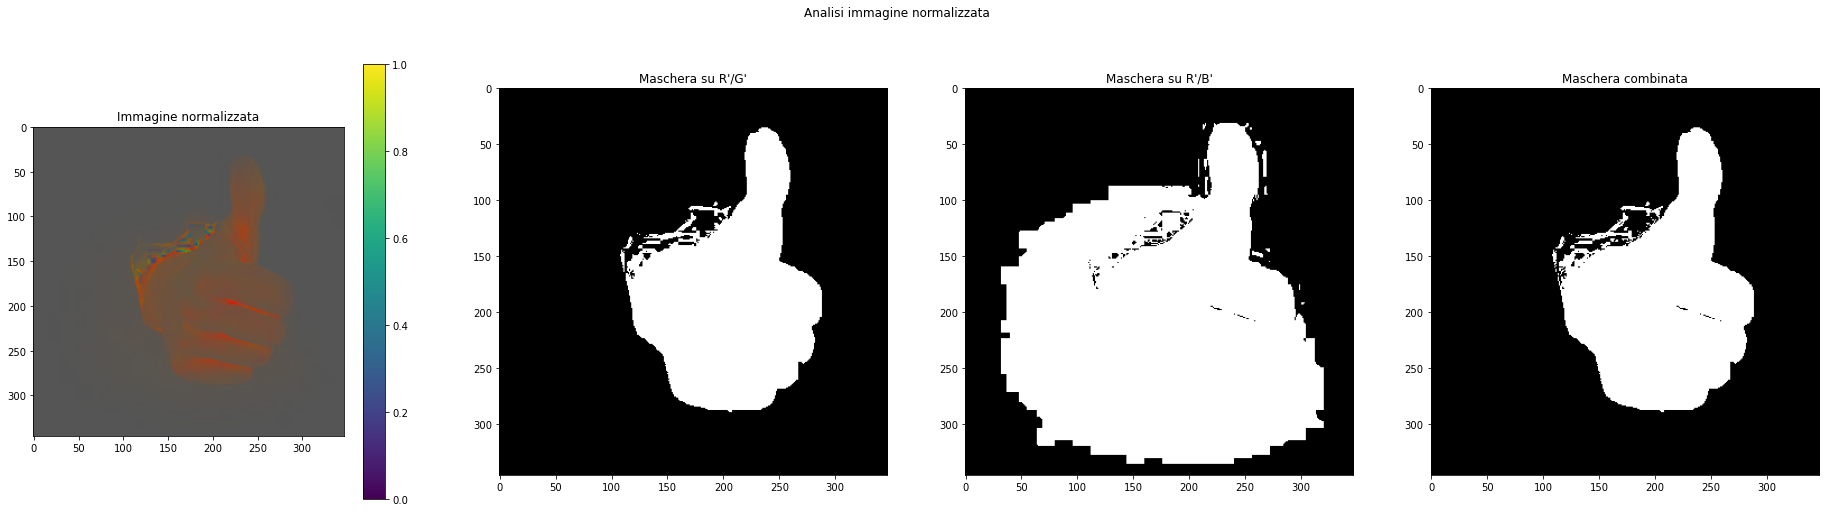

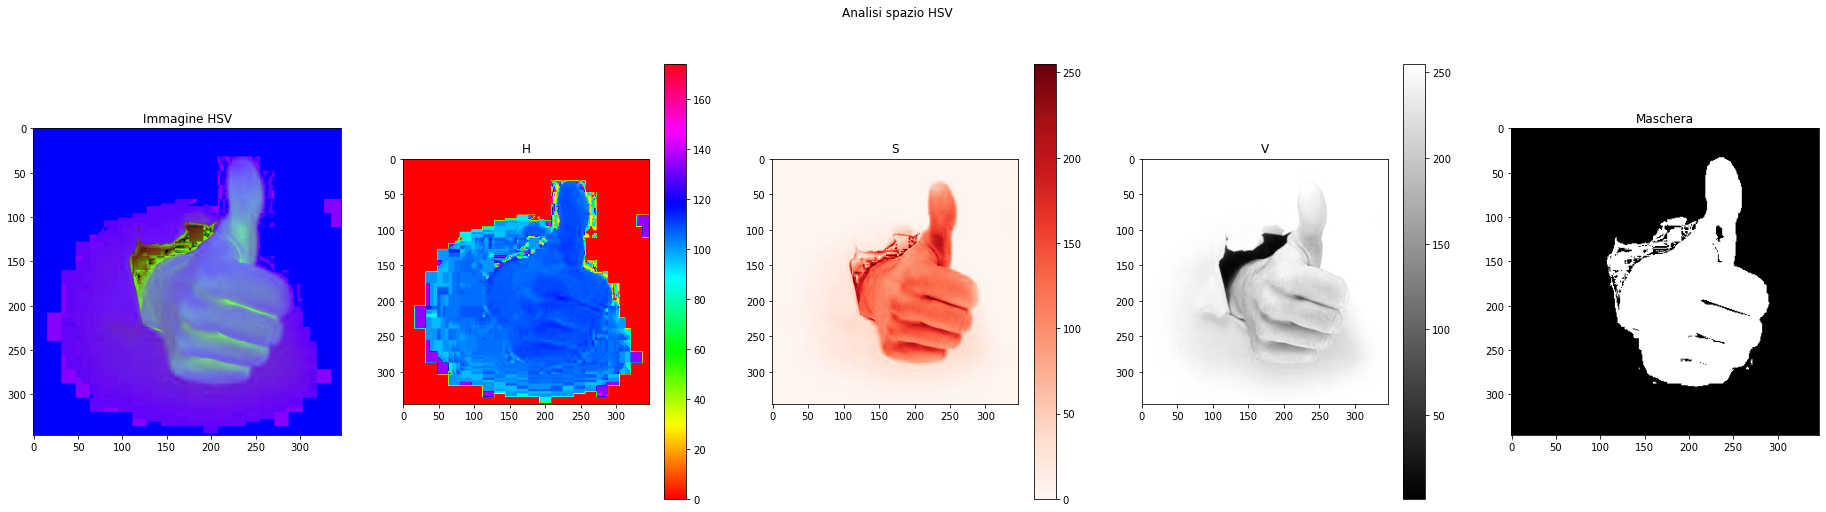

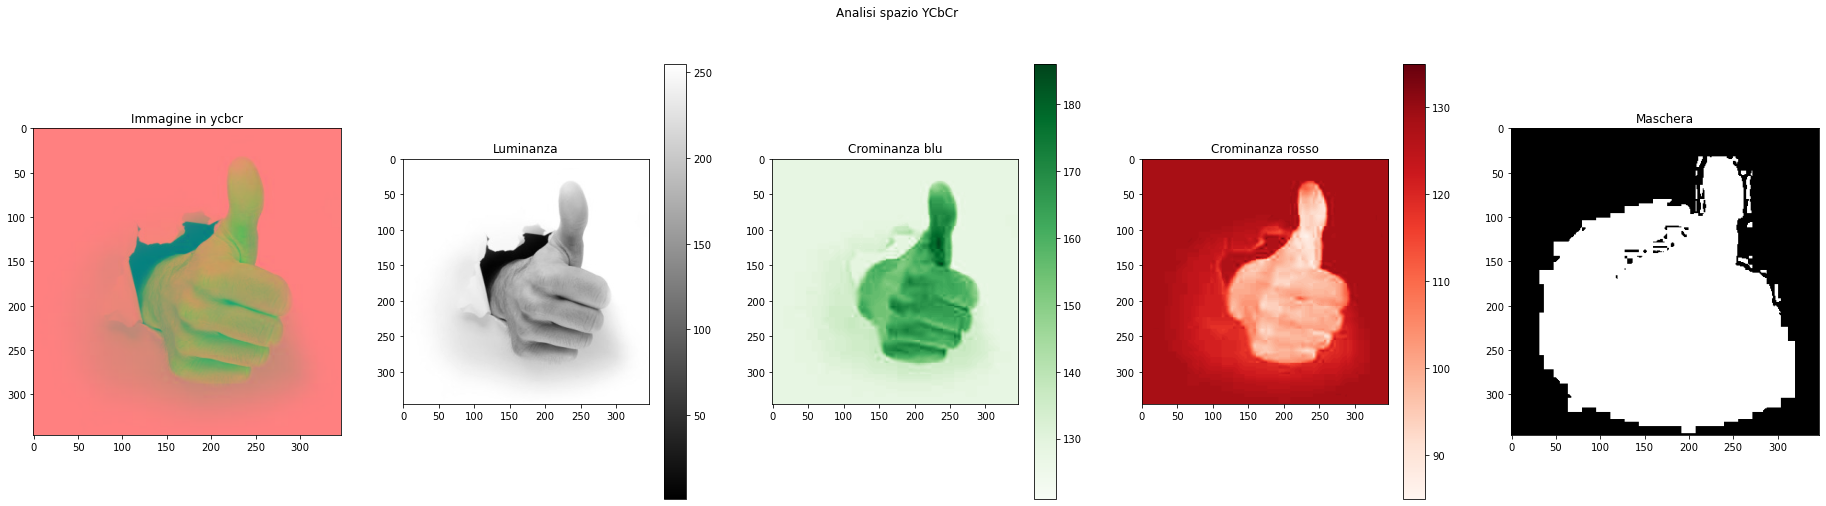

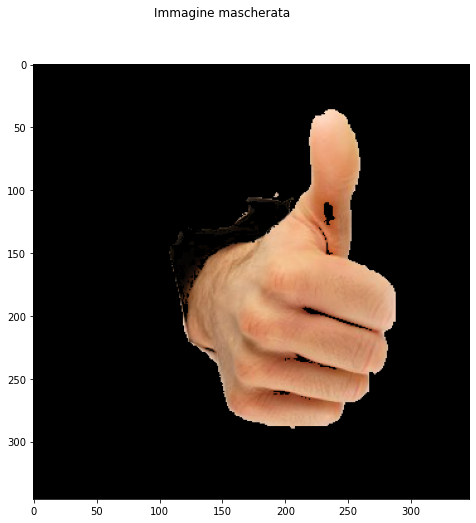

In [100]:
run_analysis("/pollicione.jpg")

/tmp/ipykernel_11565/532778935.py:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
/tmp/ipykernel_11565/532778935.py:10: RuntimeWarning: invalid value encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
/tmp/ipykernel_11565/532778935.py:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


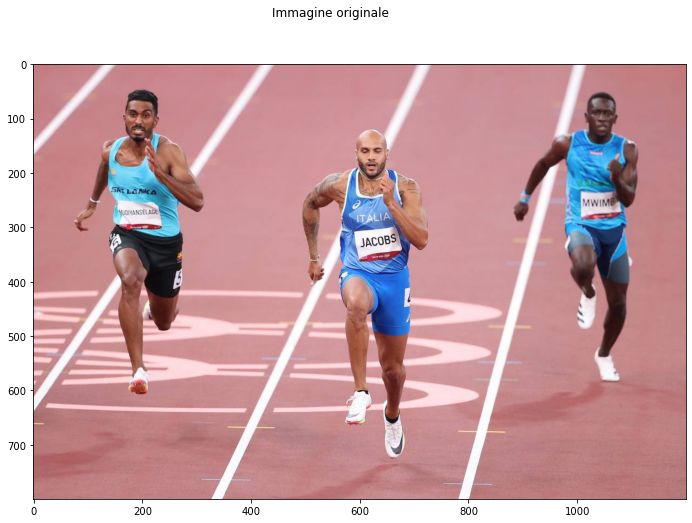

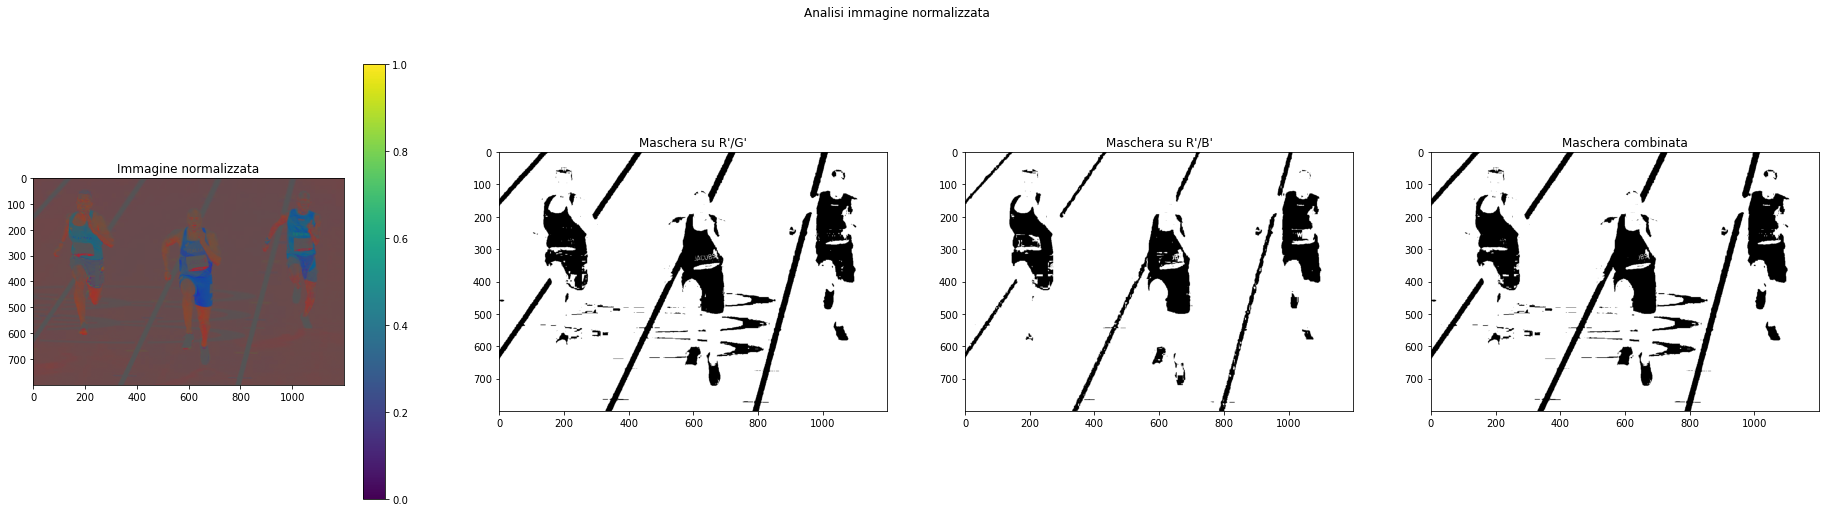

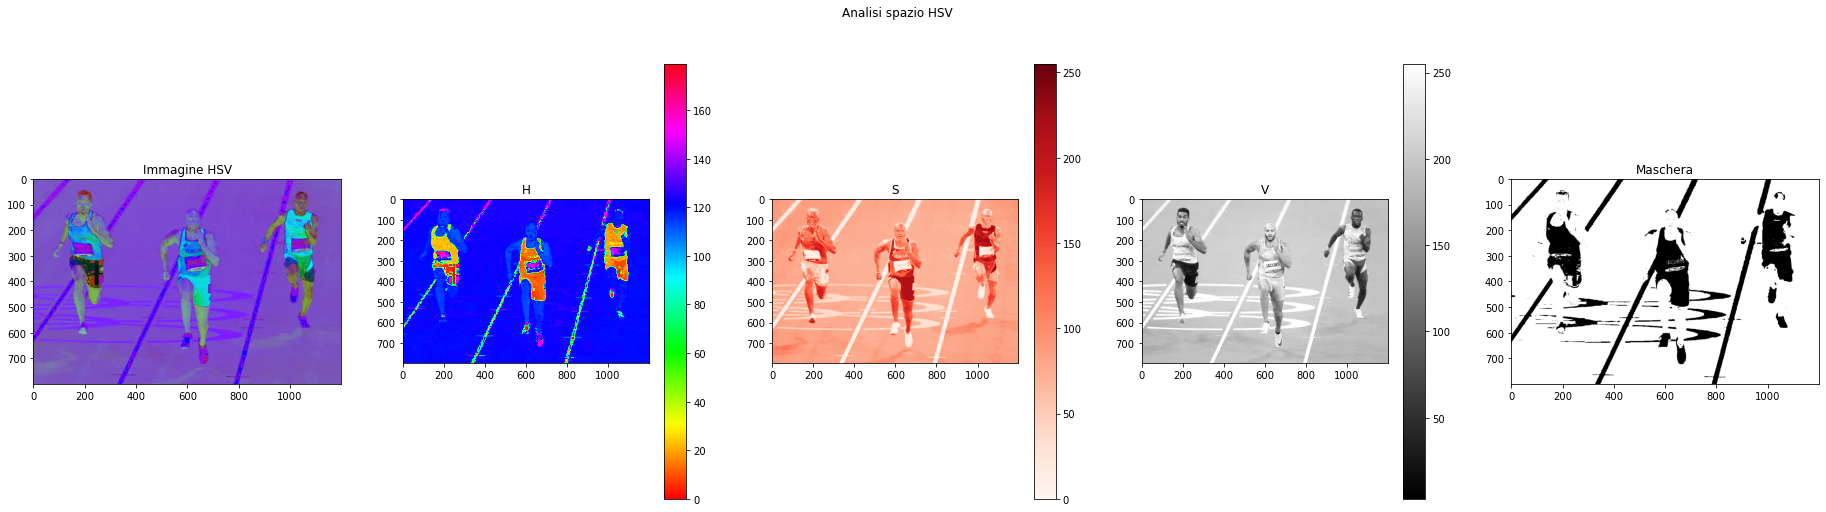

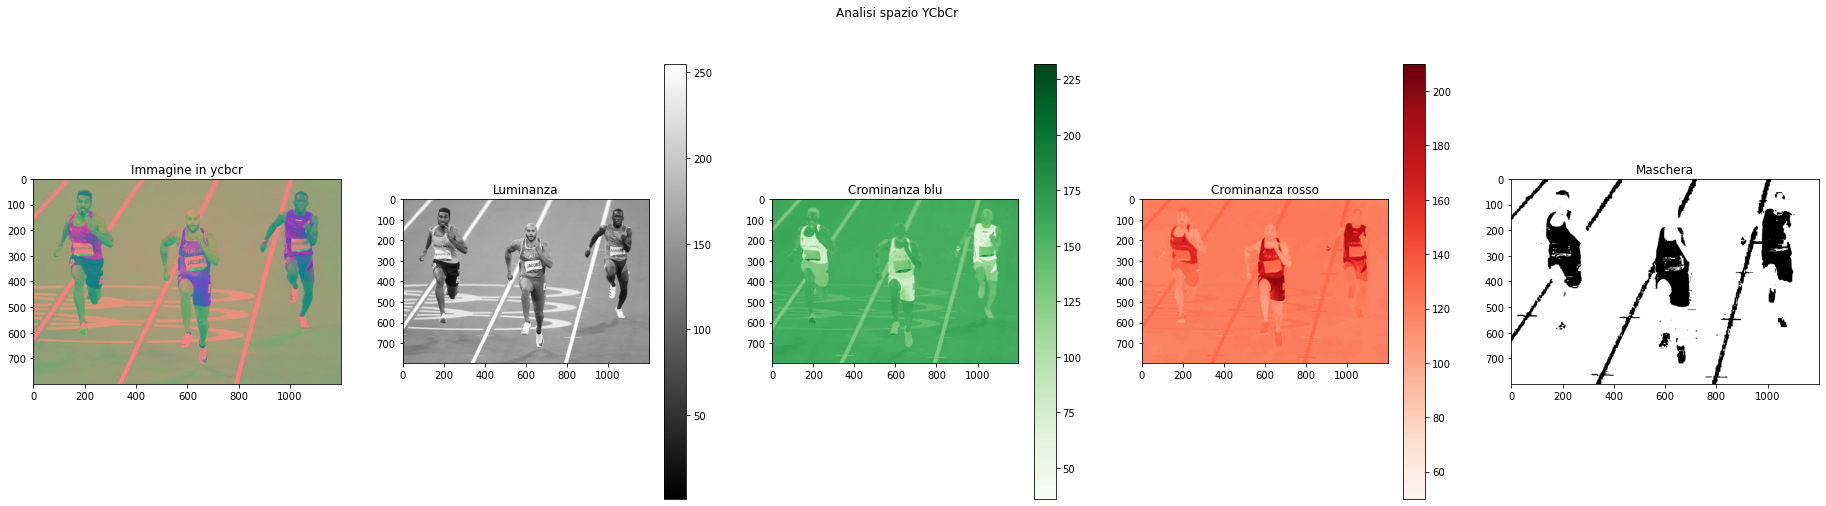

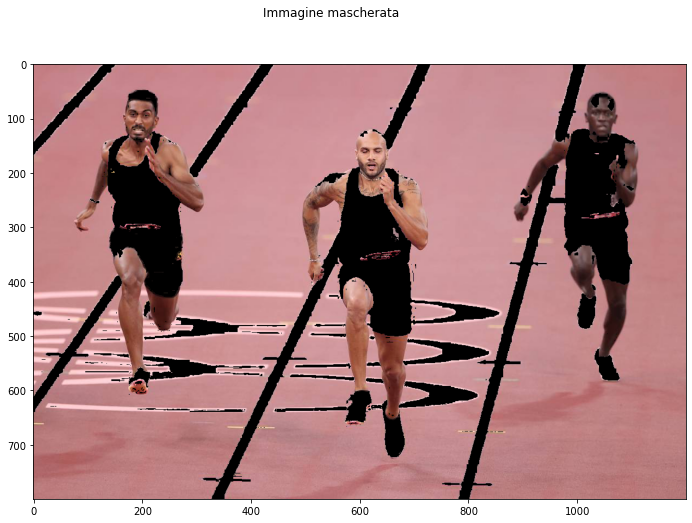

In [101]:
run_analysis("/jacobs.jpg")

/tmp/ipykernel_11565/1465490482.py:10: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,0]=r/sum
/tmp/ipykernel_11565/1465490482.py:11: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,1]=g/sum
/tmp/ipykernel_11565/1465490482.py:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,2]=b/sum
/tmp/ipykernel_11565/532778935.py:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
/tmp/ipykernel_11565/532778935.py:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


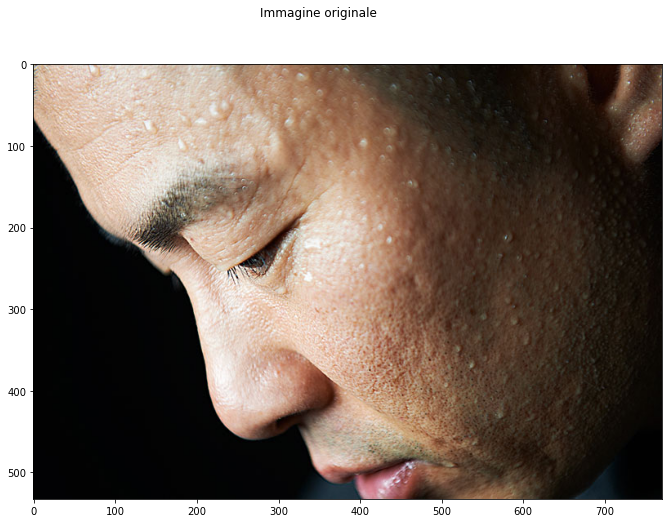

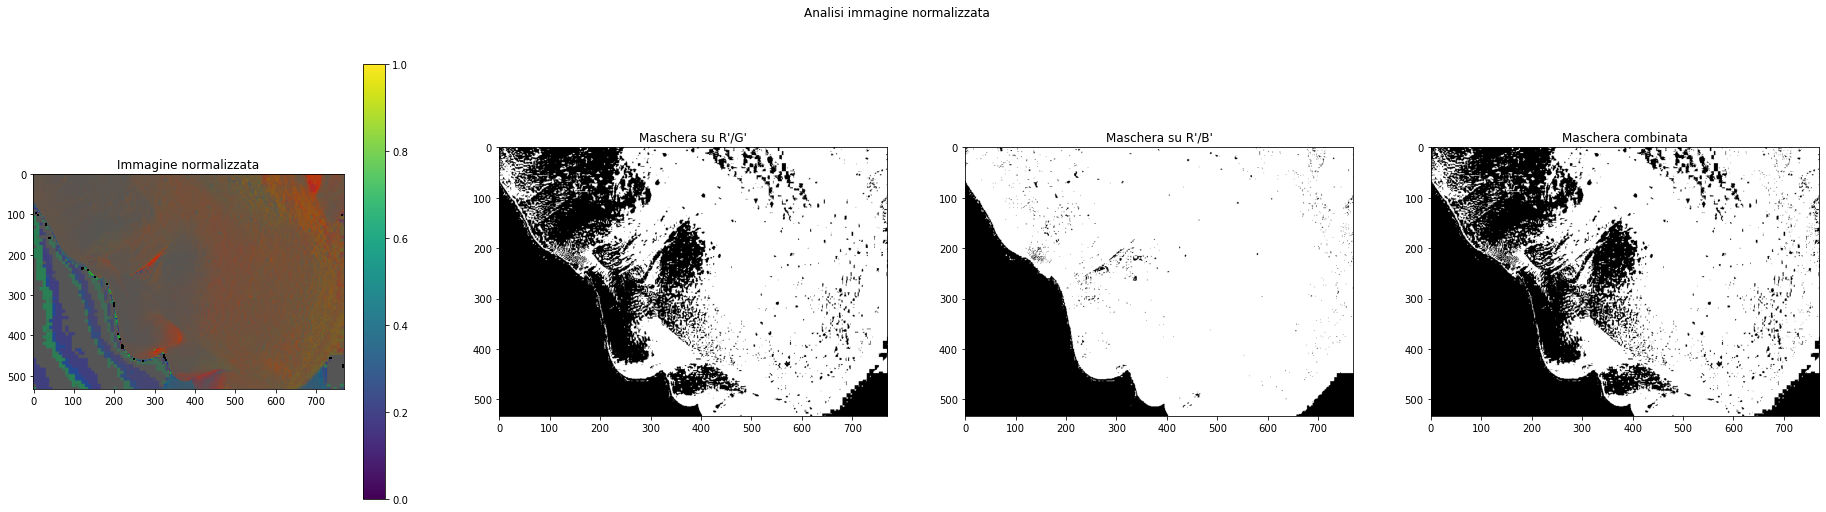

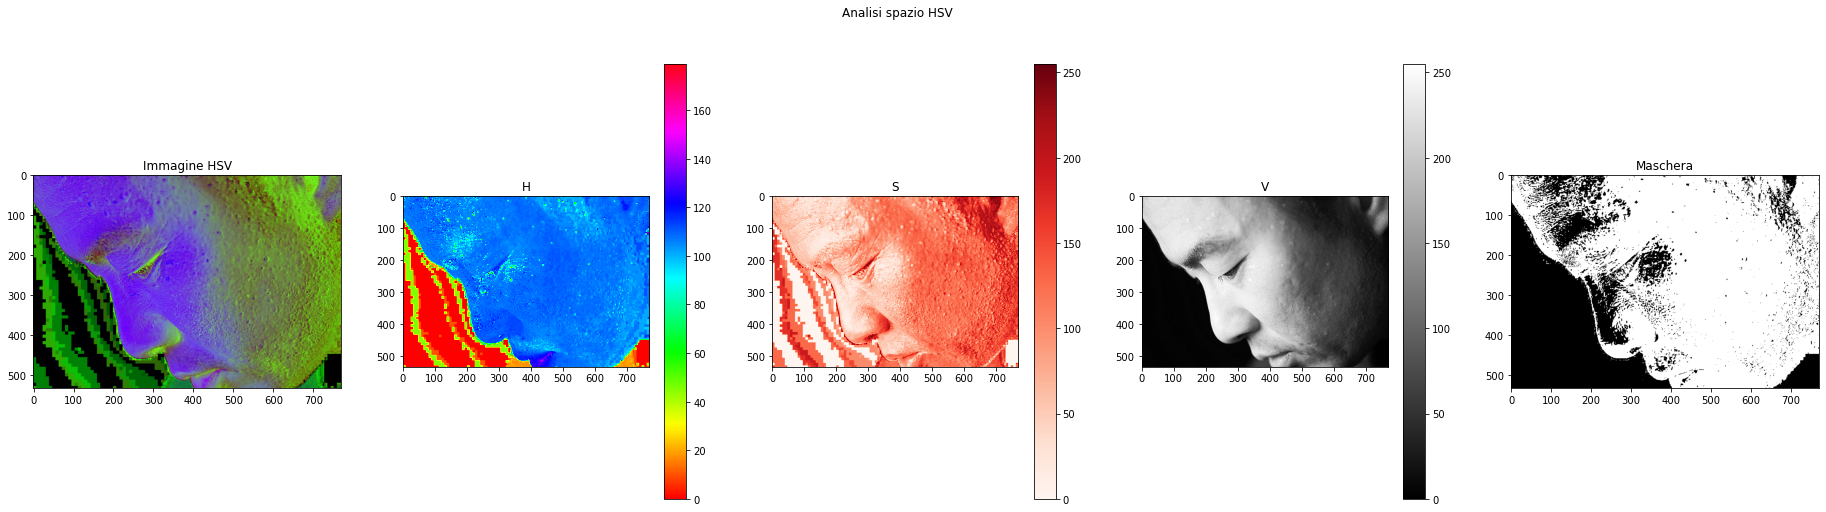

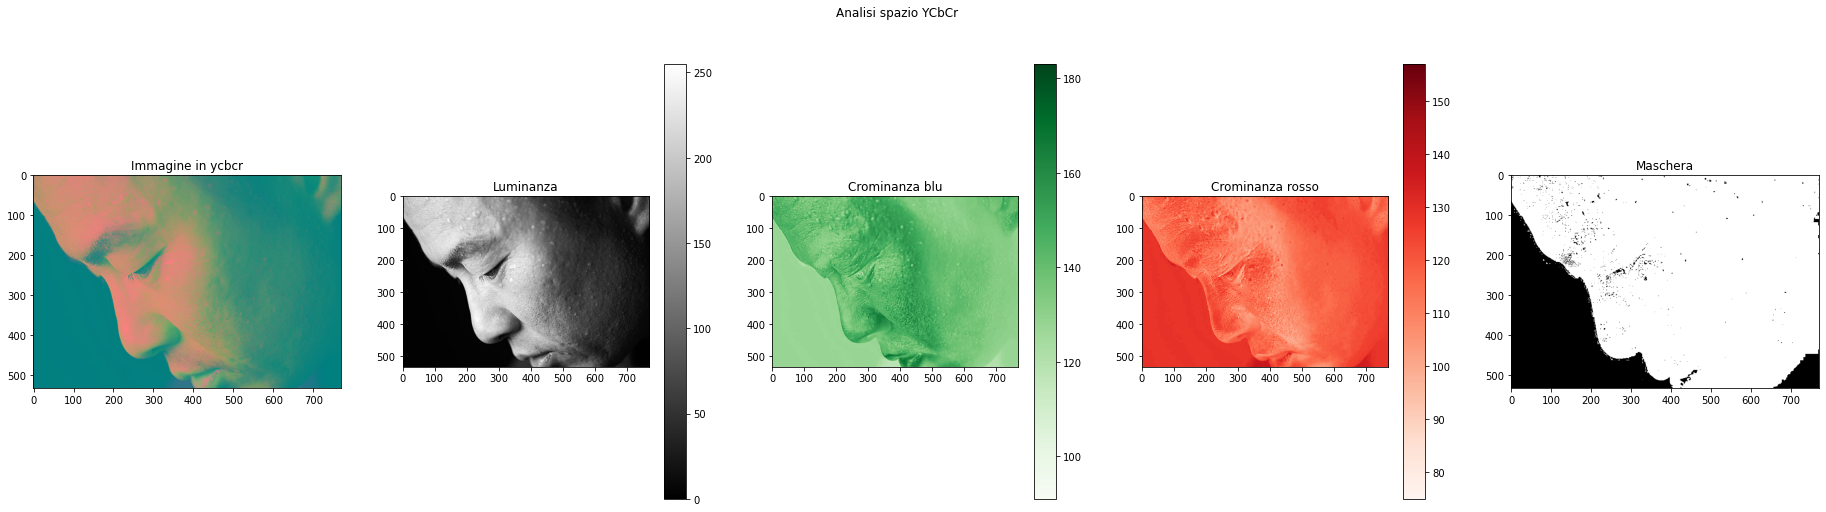

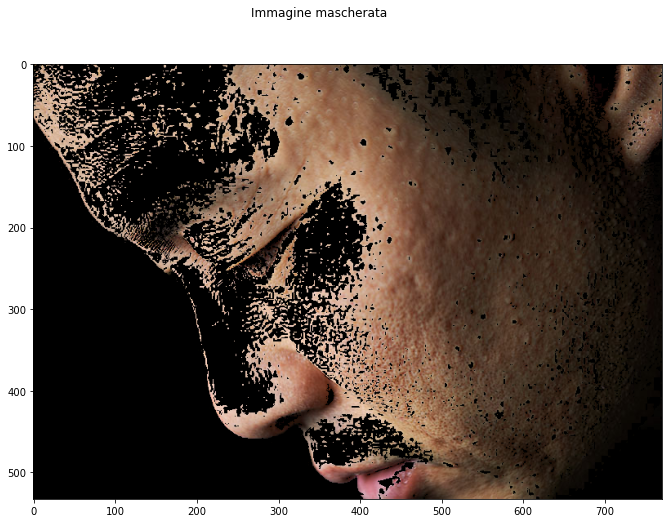

In [102]:
run_analysis('/manSweatingCloseup.jpg')

In [103]:
#run_skin_analysis_ycbcr()

In [104]:
#run_skin_analysis_hsv()

/tmp/ipykernel_11565/3491474482.py:30: RuntimeWarning: divide by zero encountered in true_divide
  tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).max(axis=1)
/tmp/ipykernel_11565/3491474482.py:31: RuntimeWarning: divide by zero encountered in true_divide
  tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).min(axis=1)
/tmp/ipykernel_11565/3491474482.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(32, 8))
/tmp/ipykernel_11565/3491474482.py:30: RuntimeWarning: divide by zero encountered in true_divide
  tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).max(axis=1)
/tmp/ipykernel_11565/3491474482.py:31: RuntimeWarning: divide by zero encountered in true_divide
  tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :,

Massimi = [2.3875003, inf], Minimi = [0.9918033, 0.96153843]


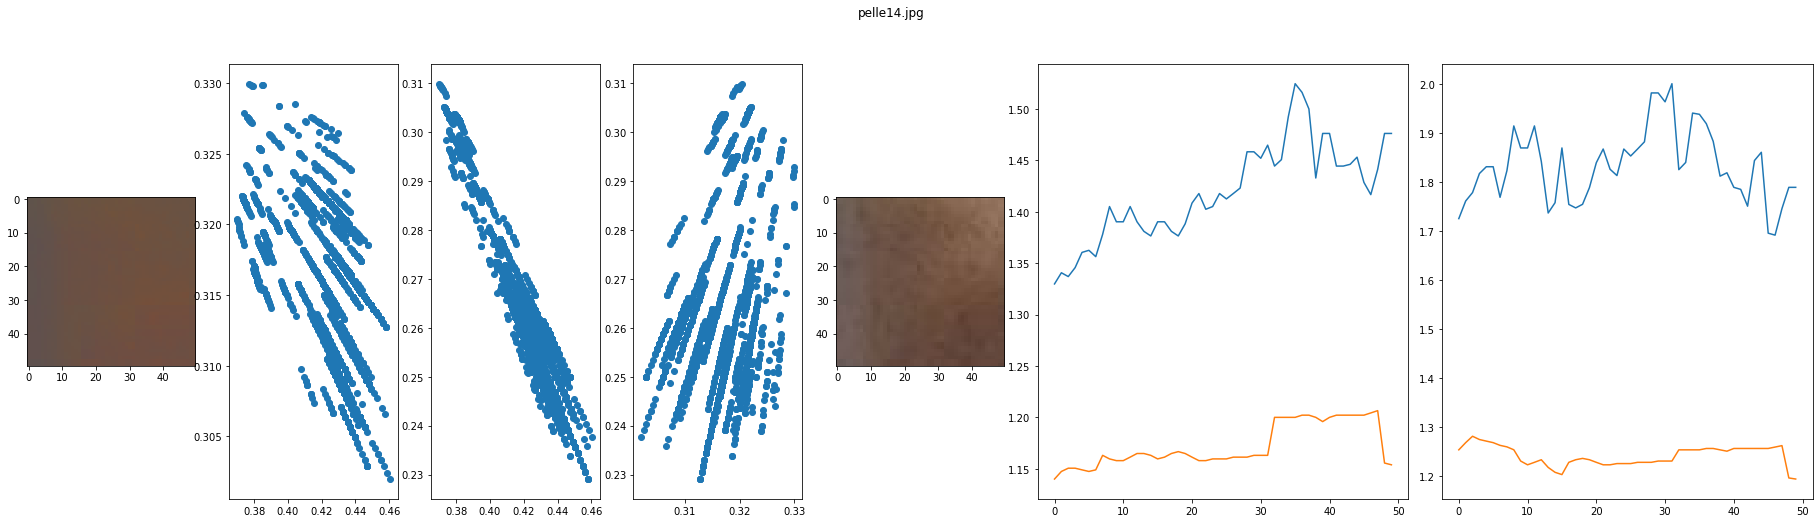

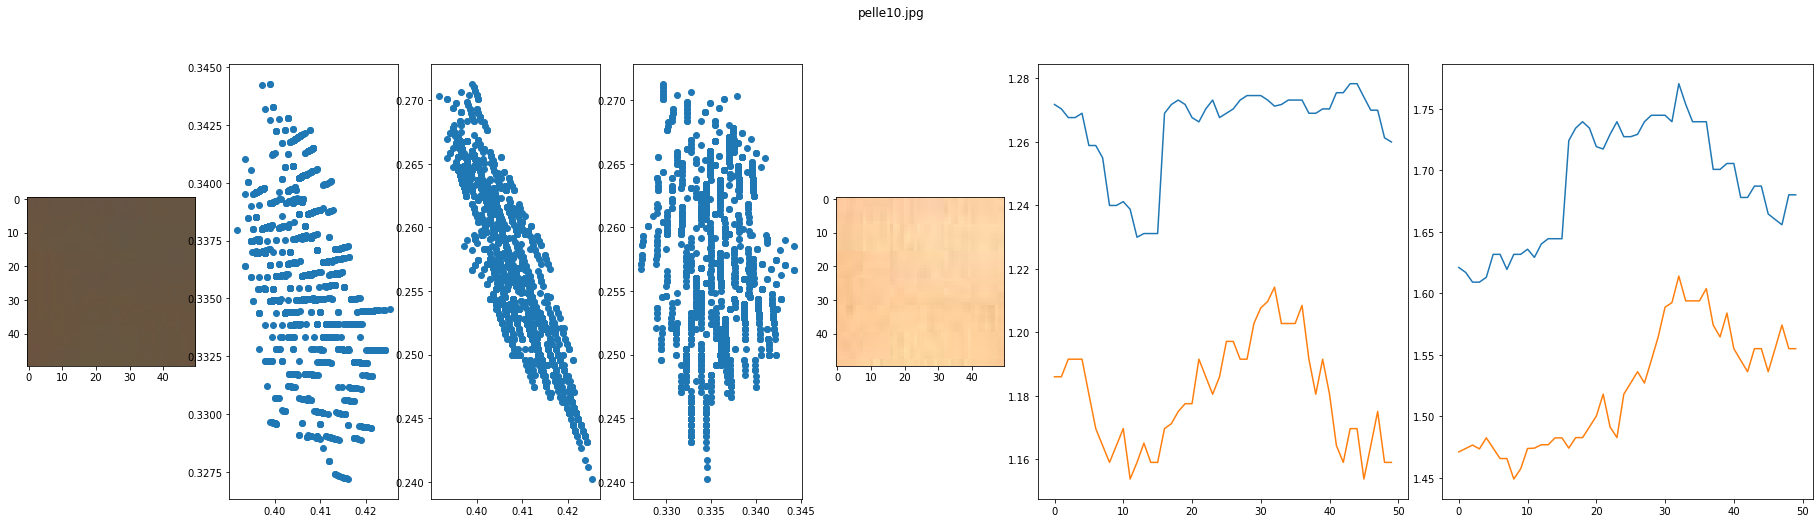

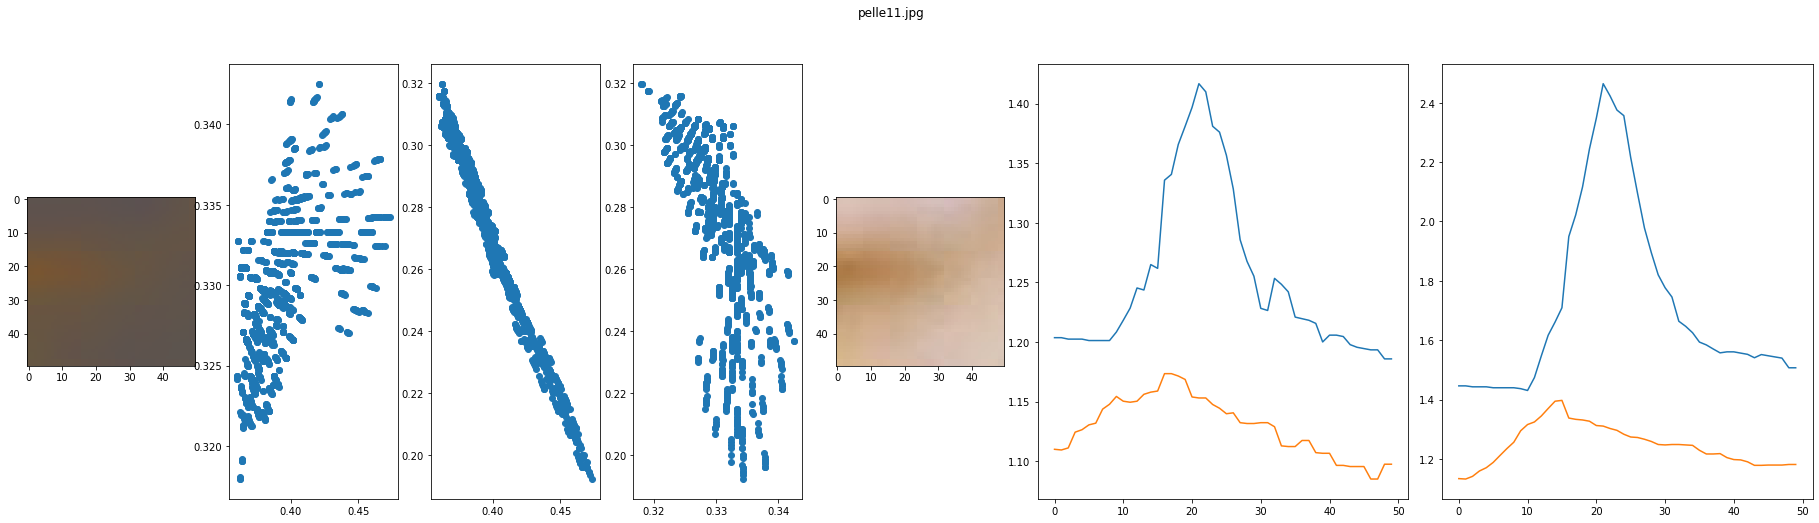

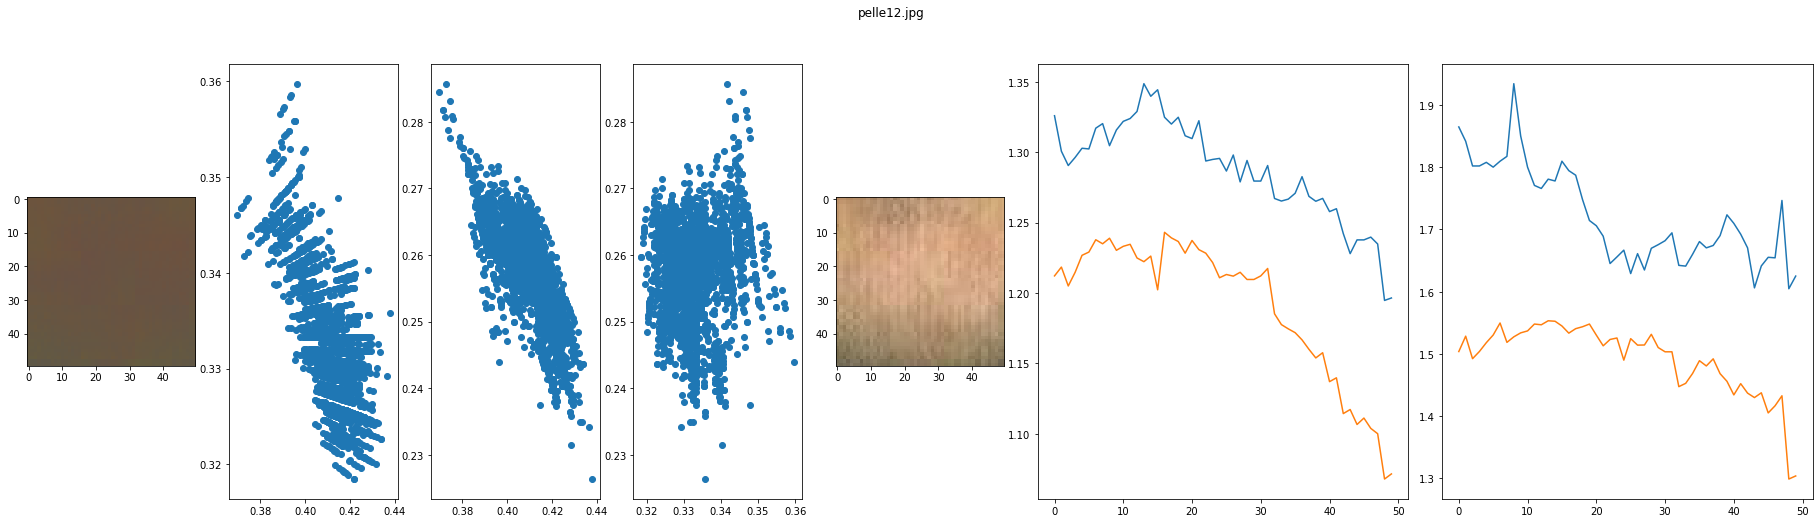

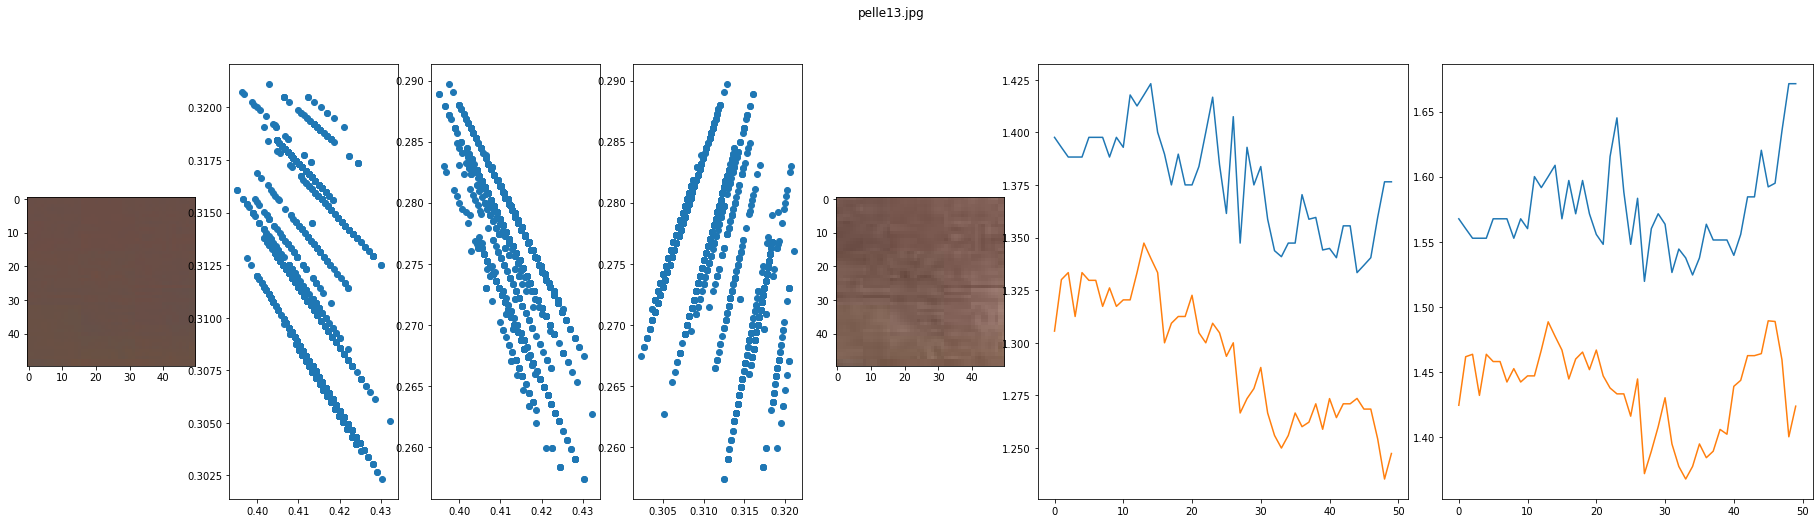

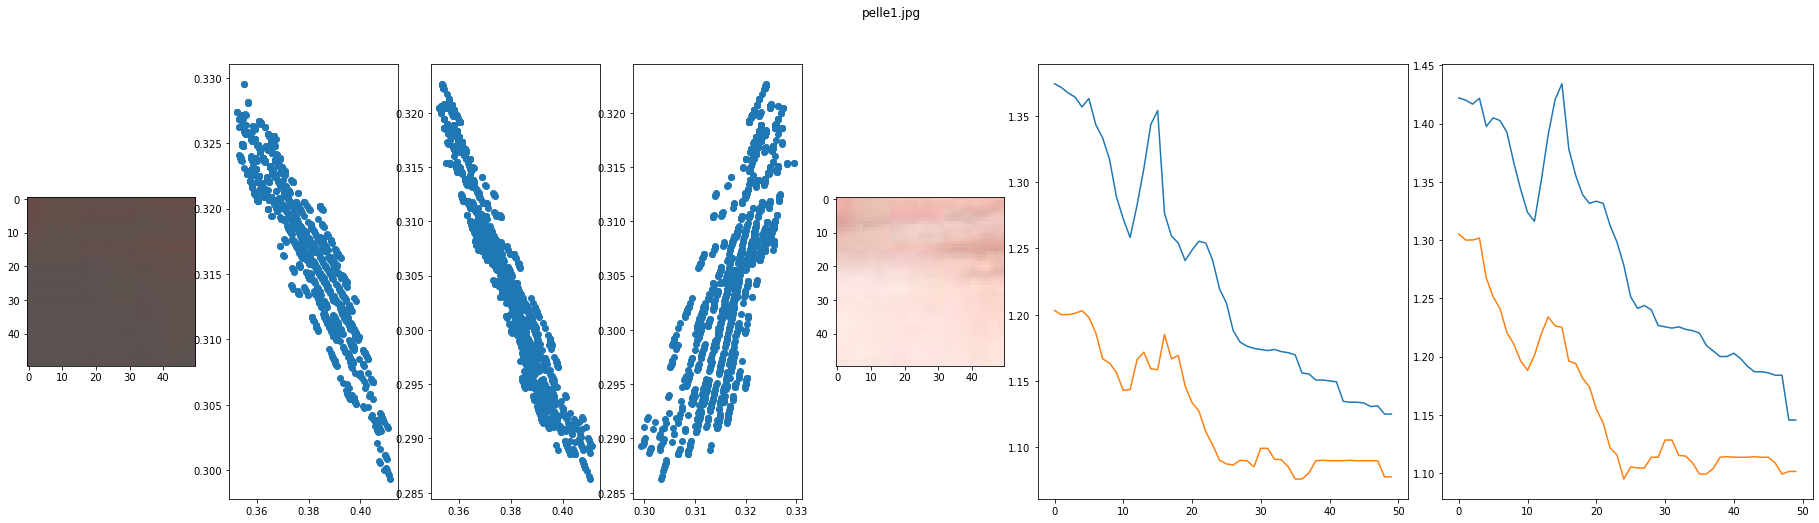

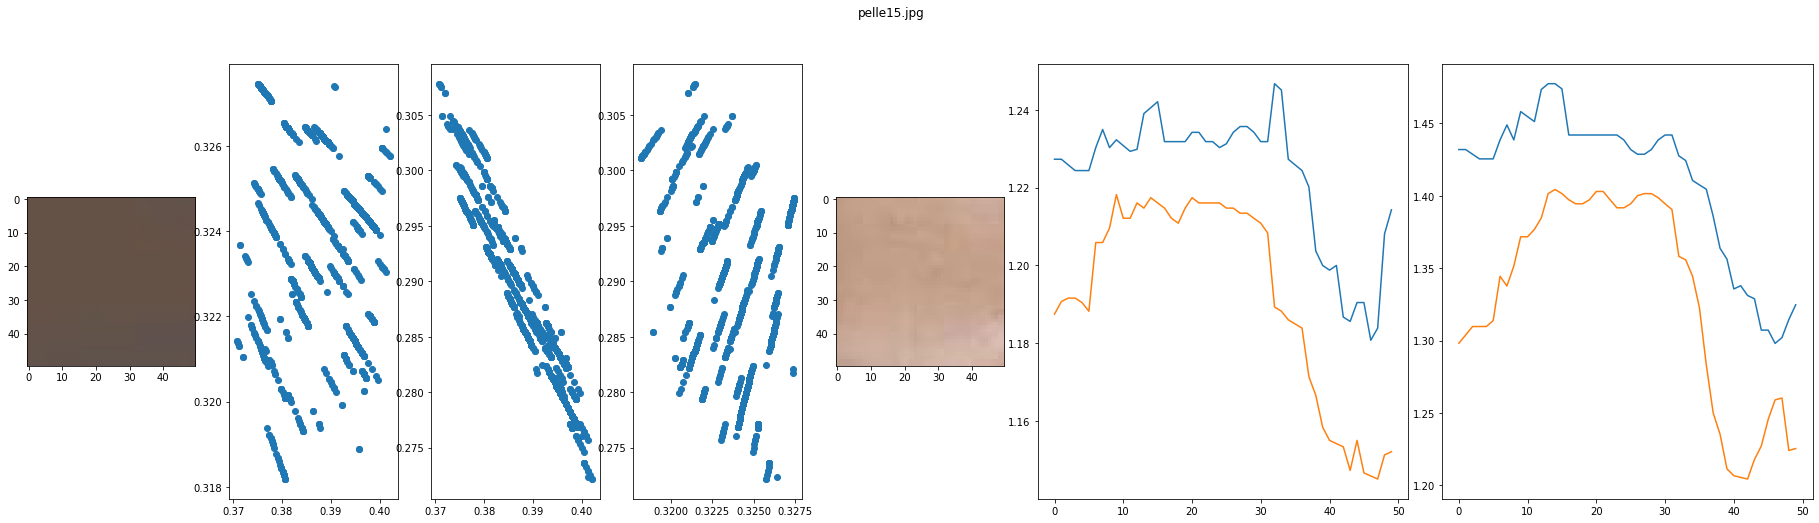

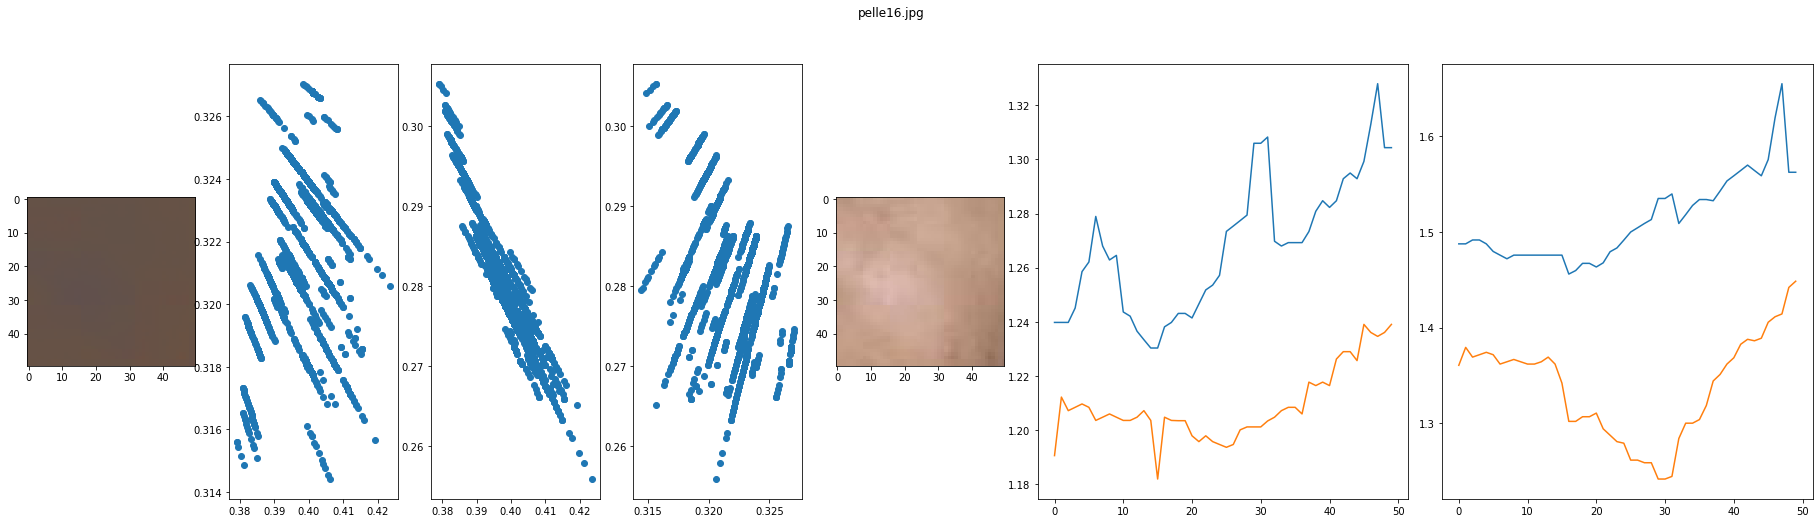

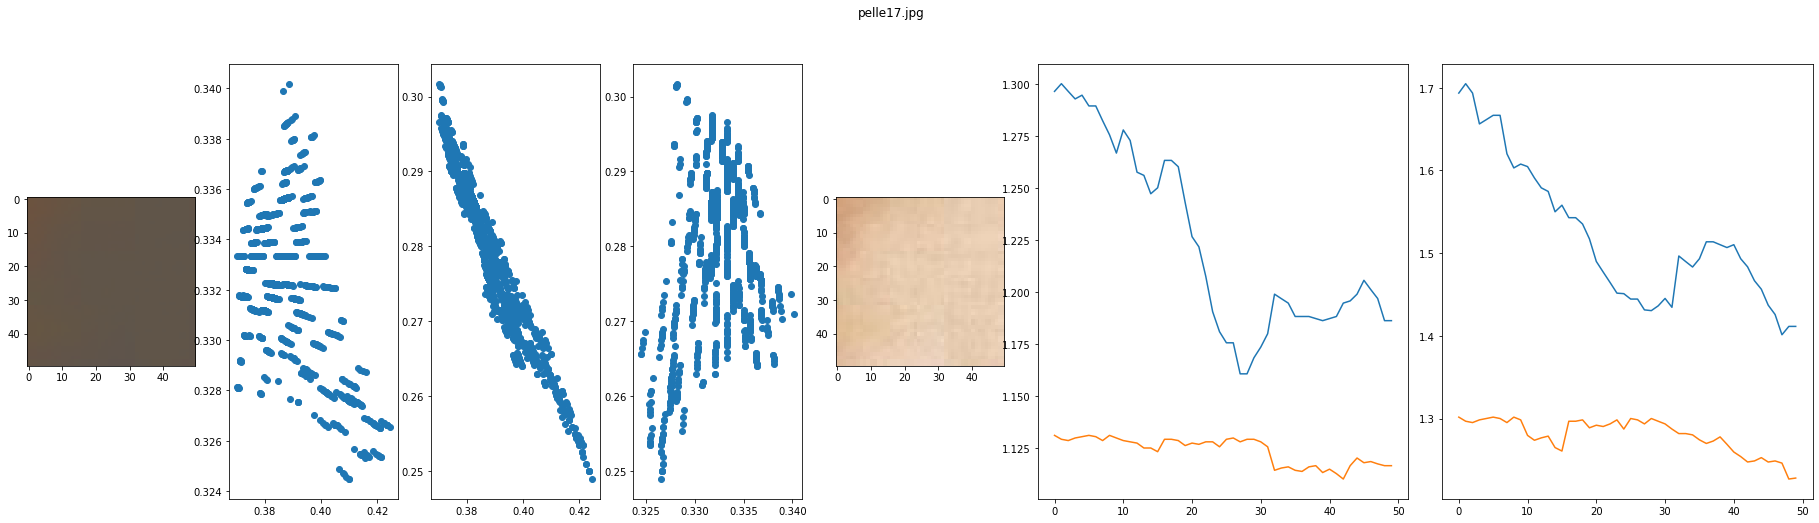

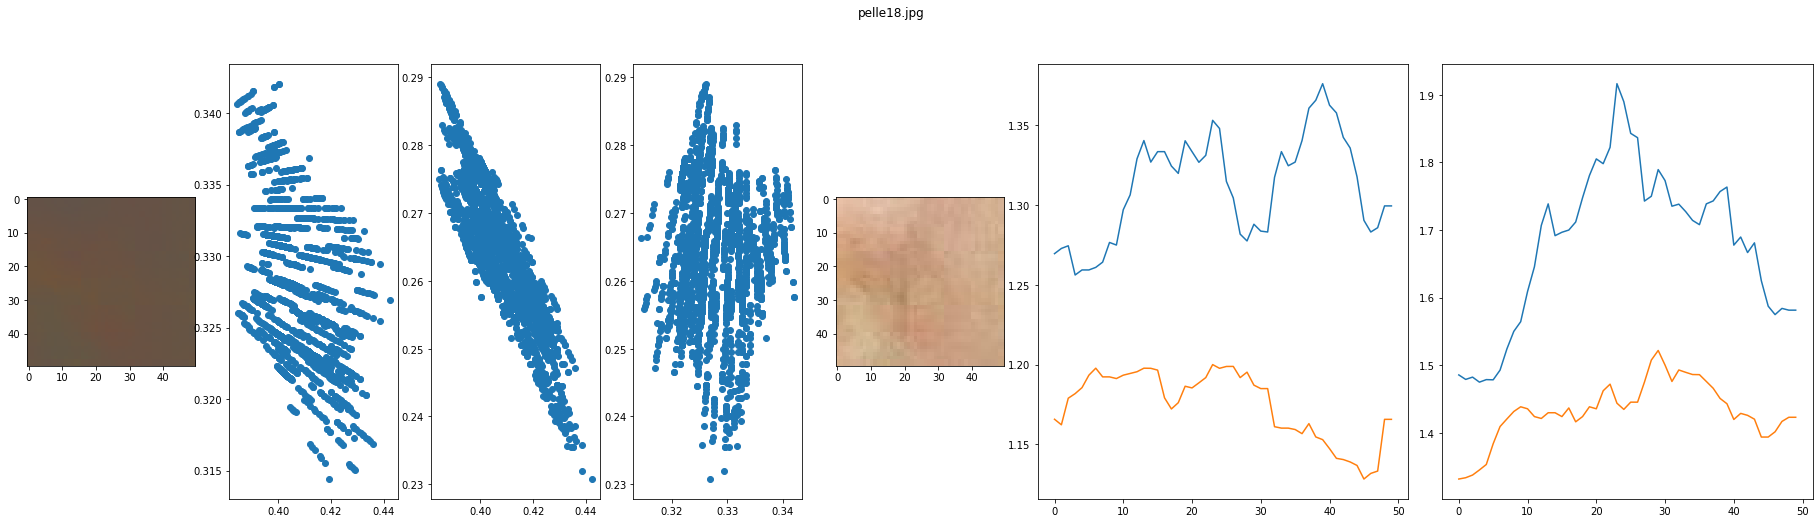

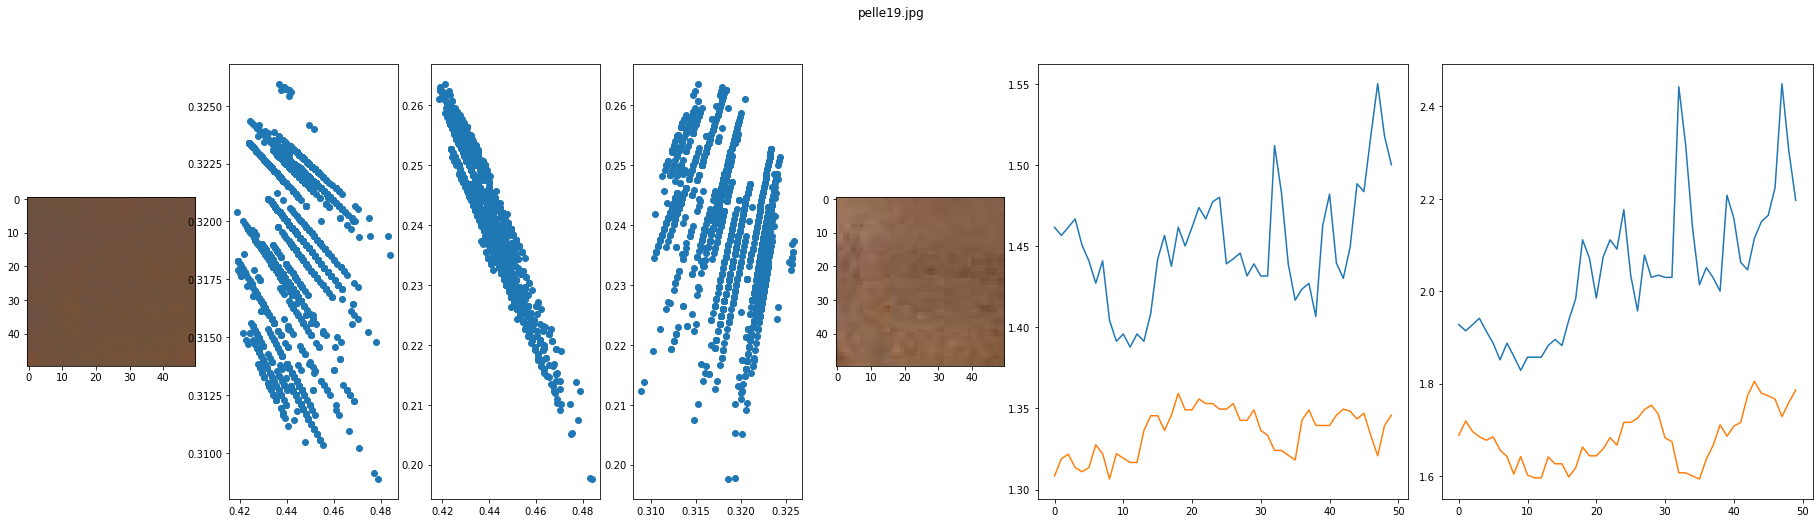

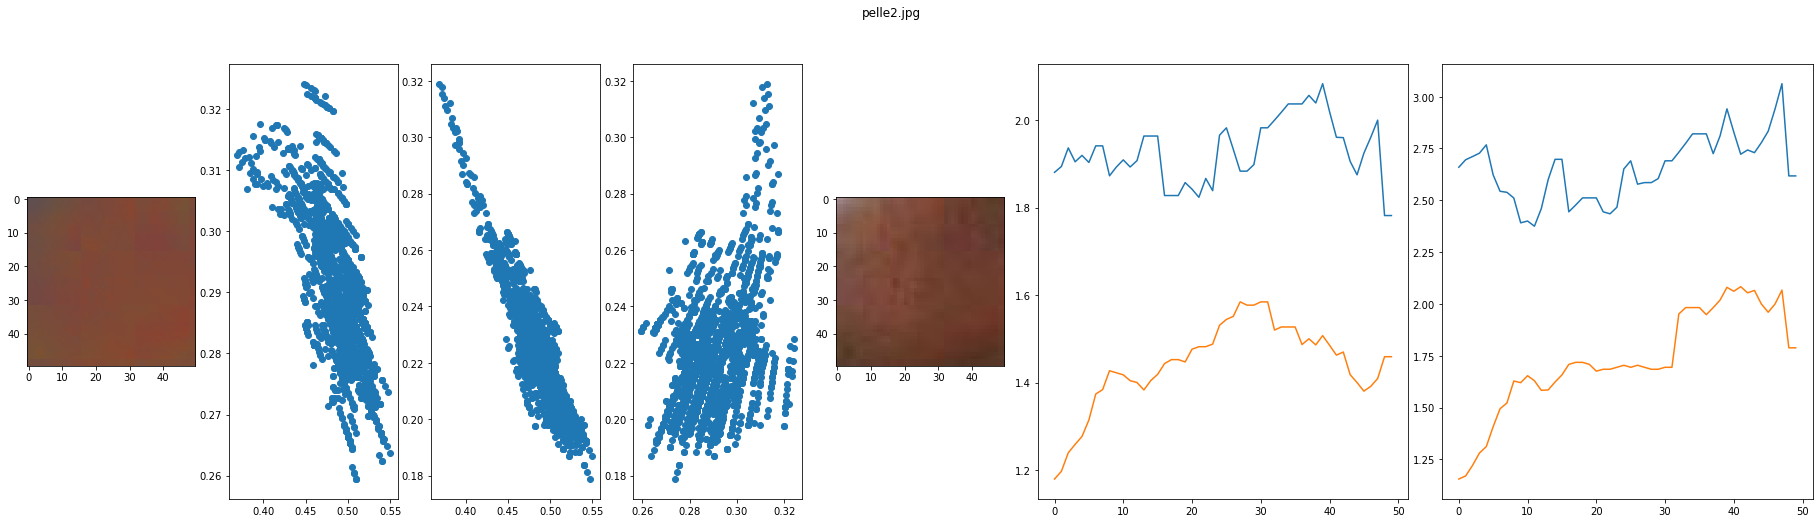

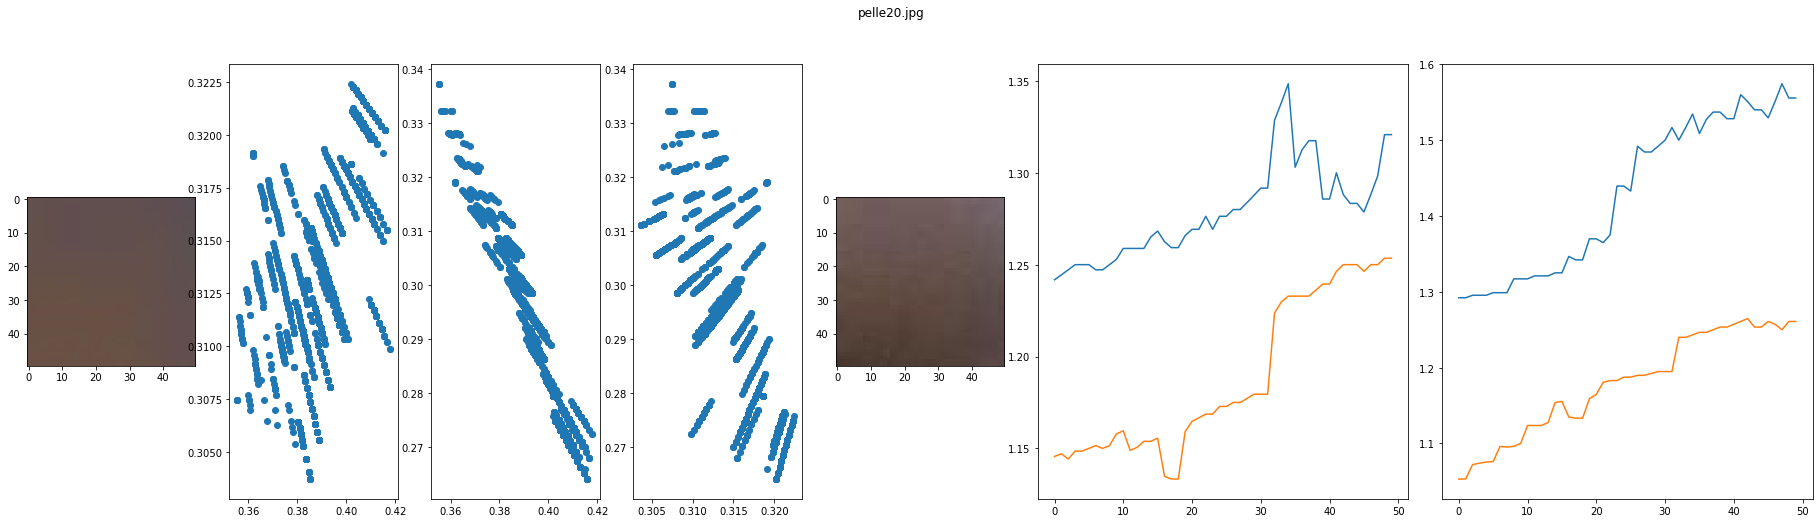

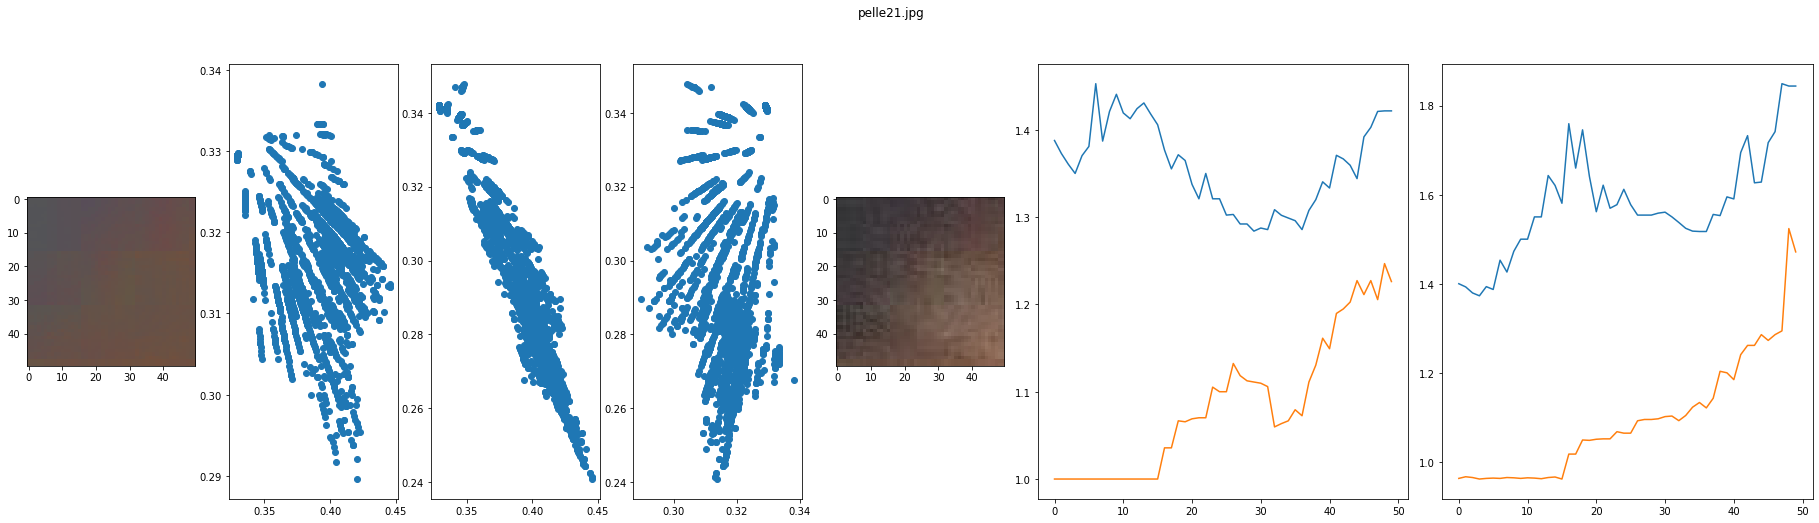

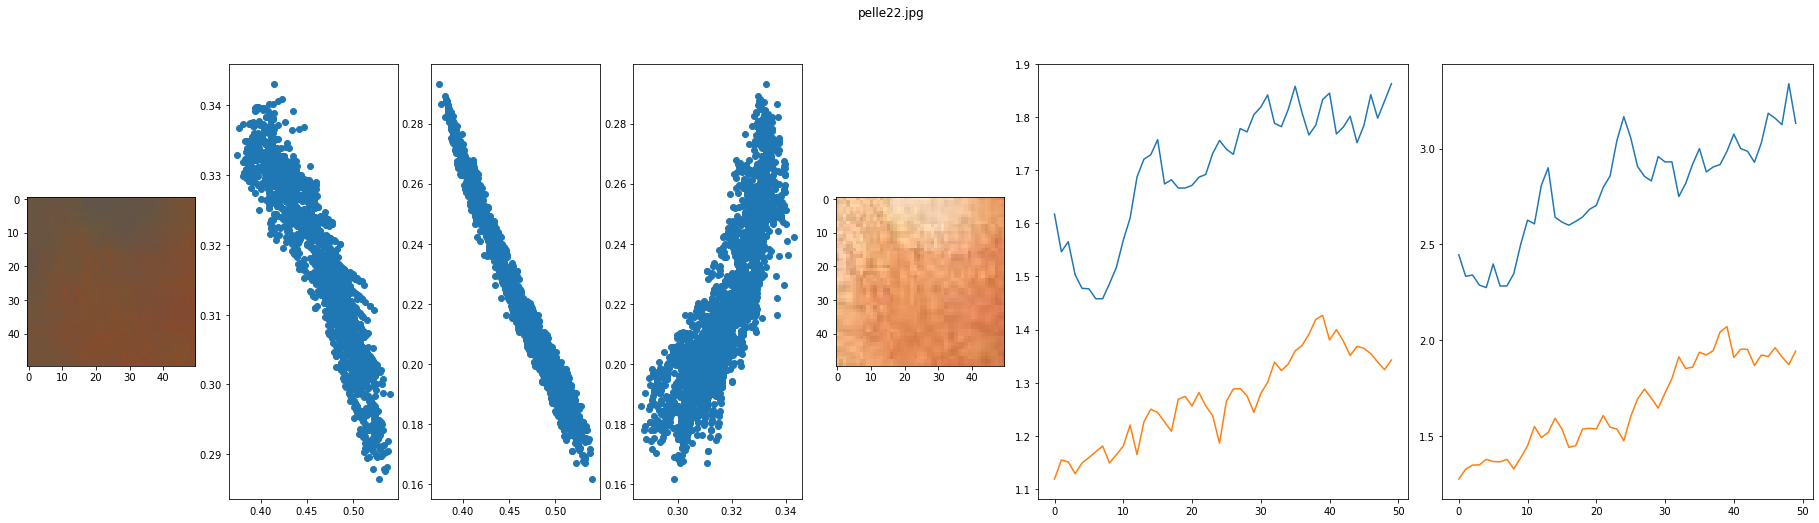

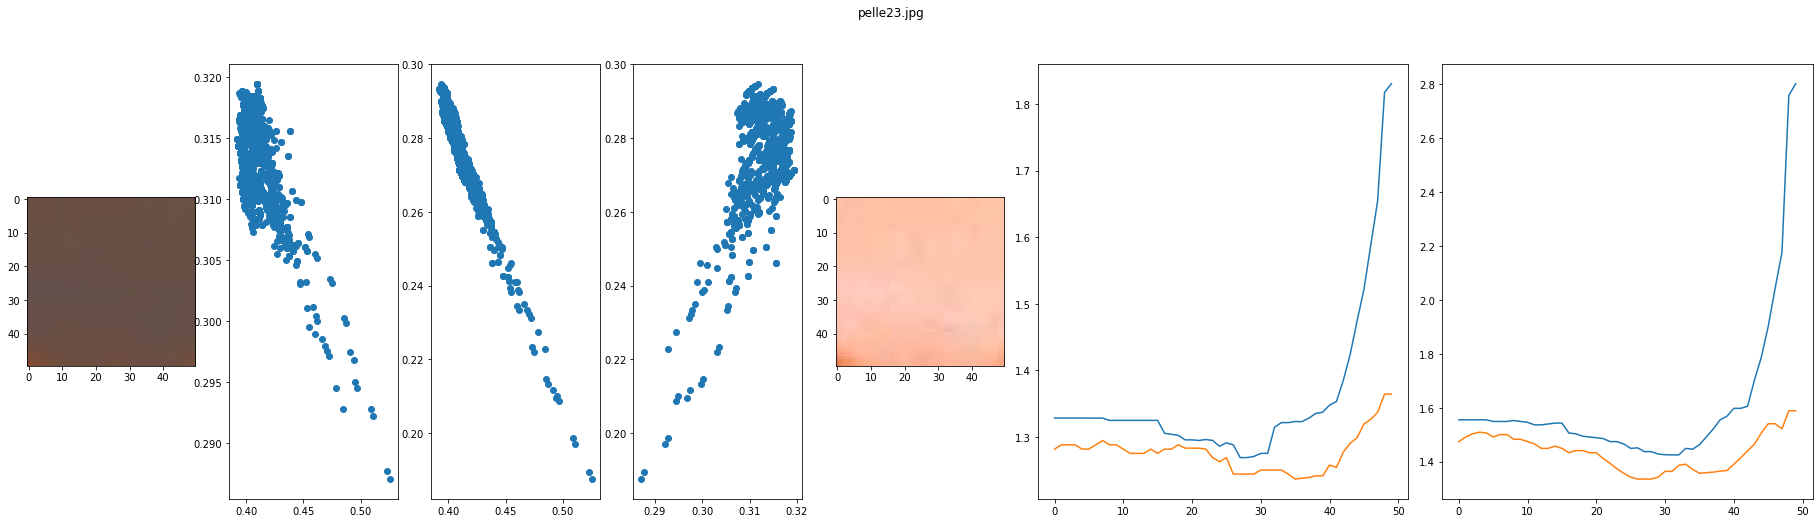

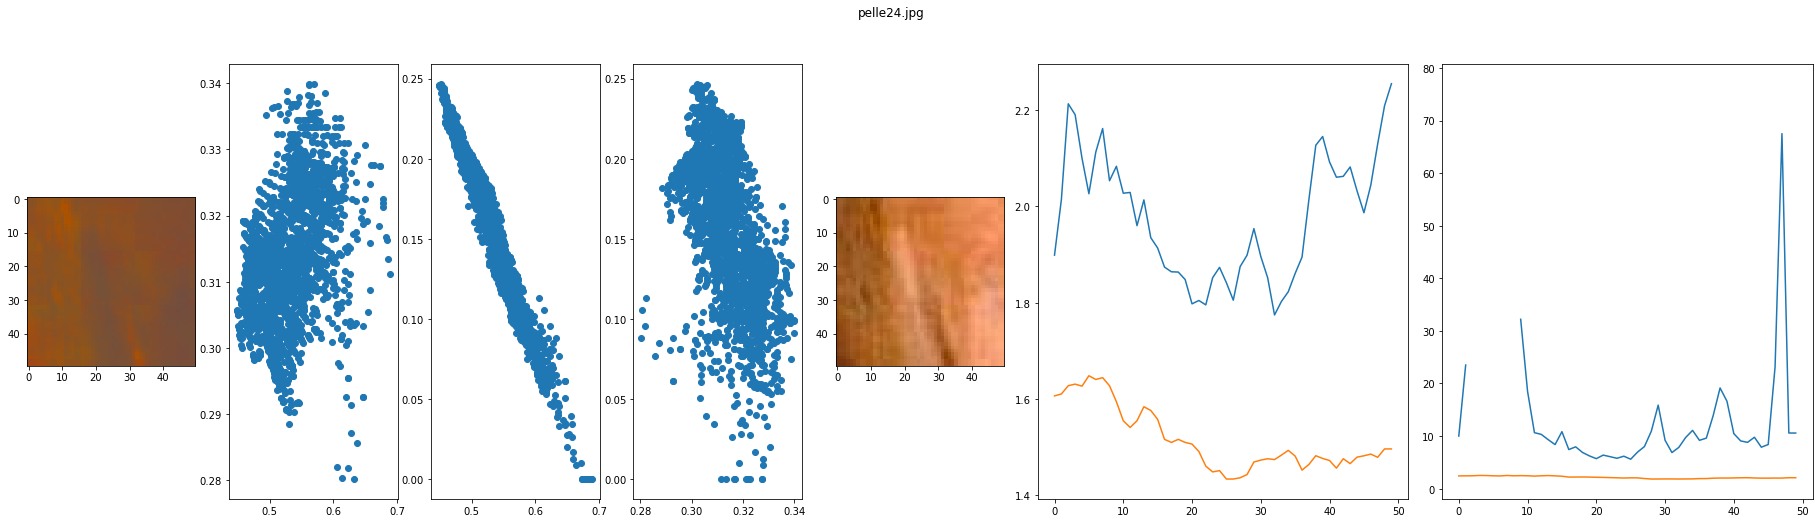

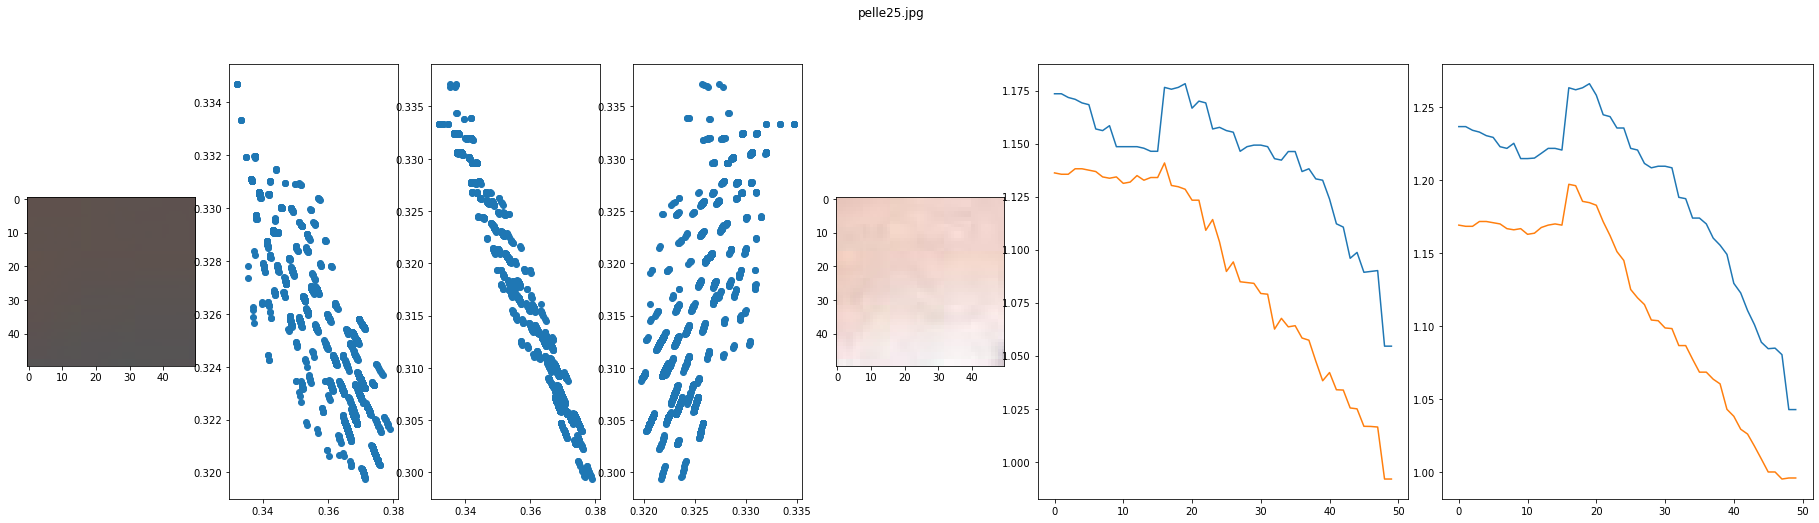

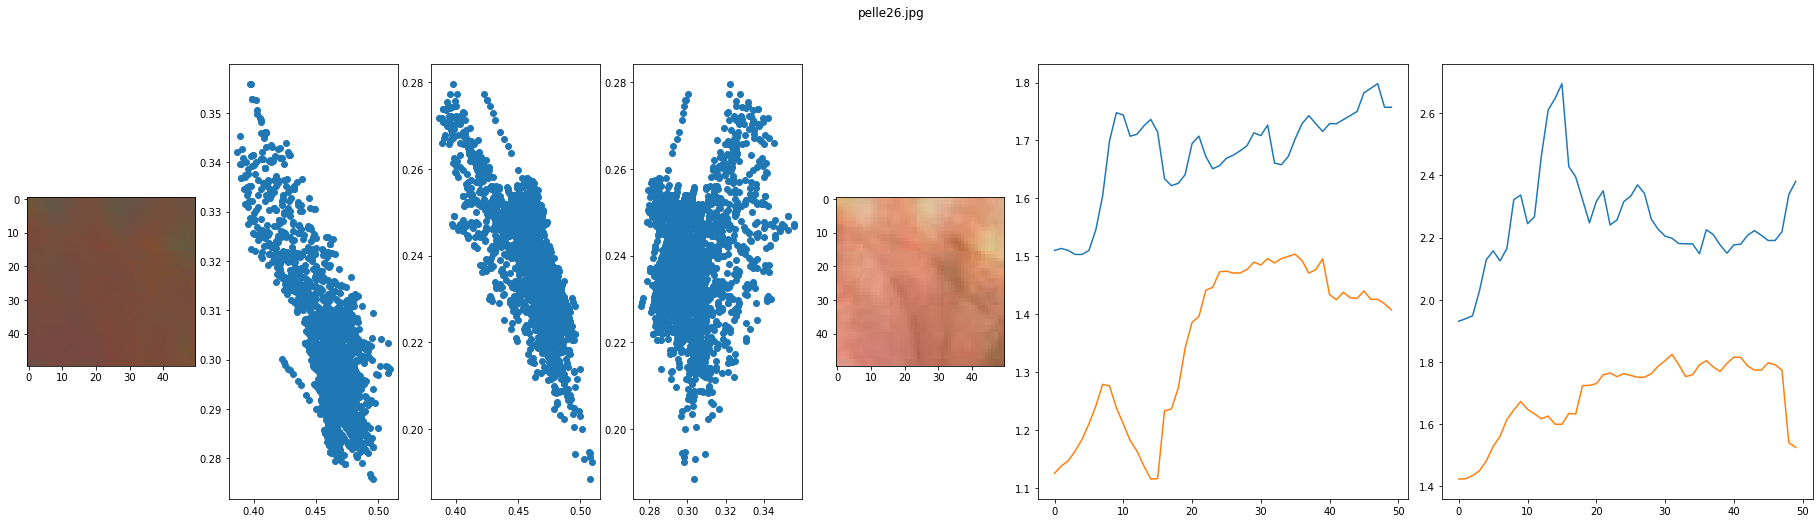

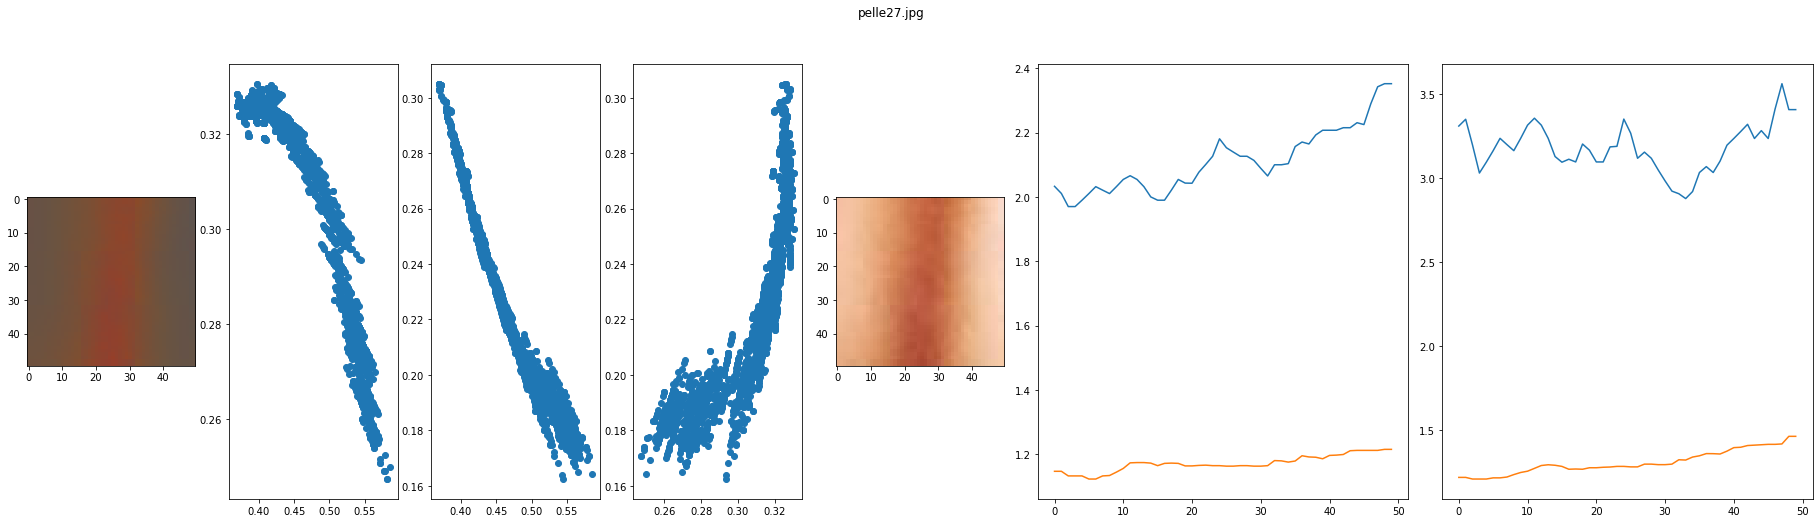

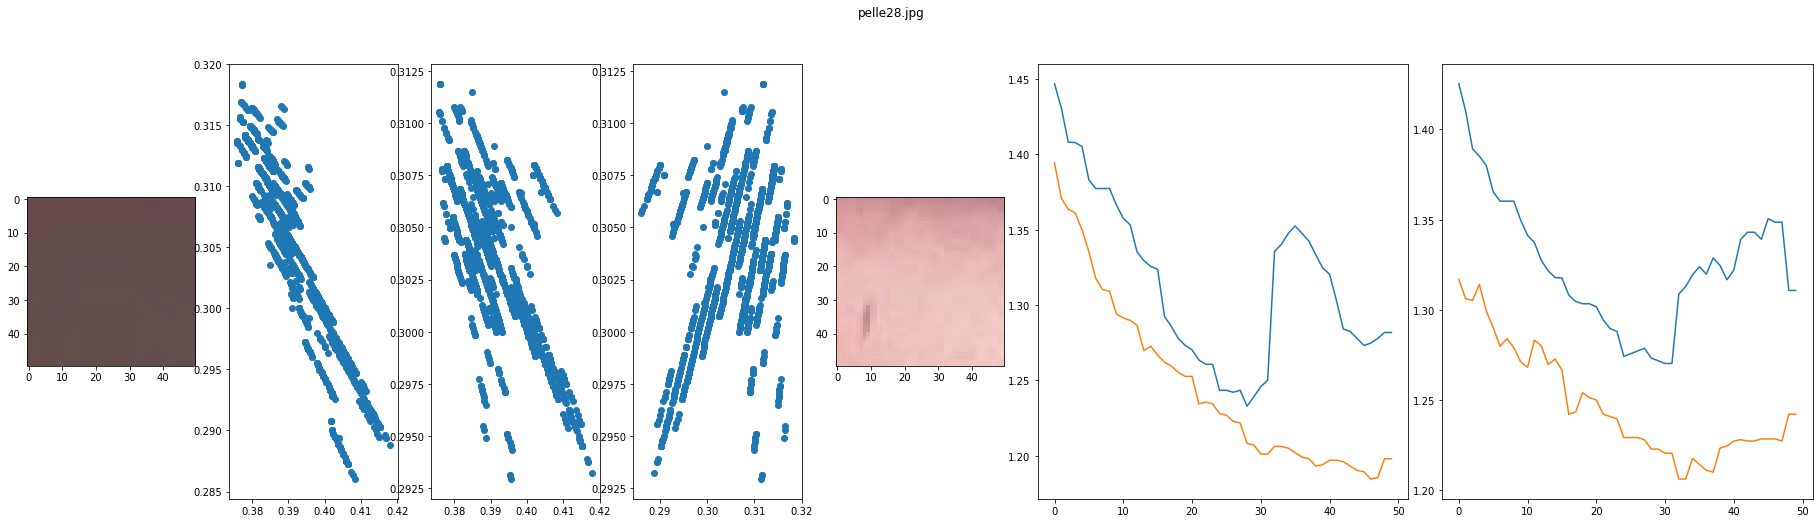

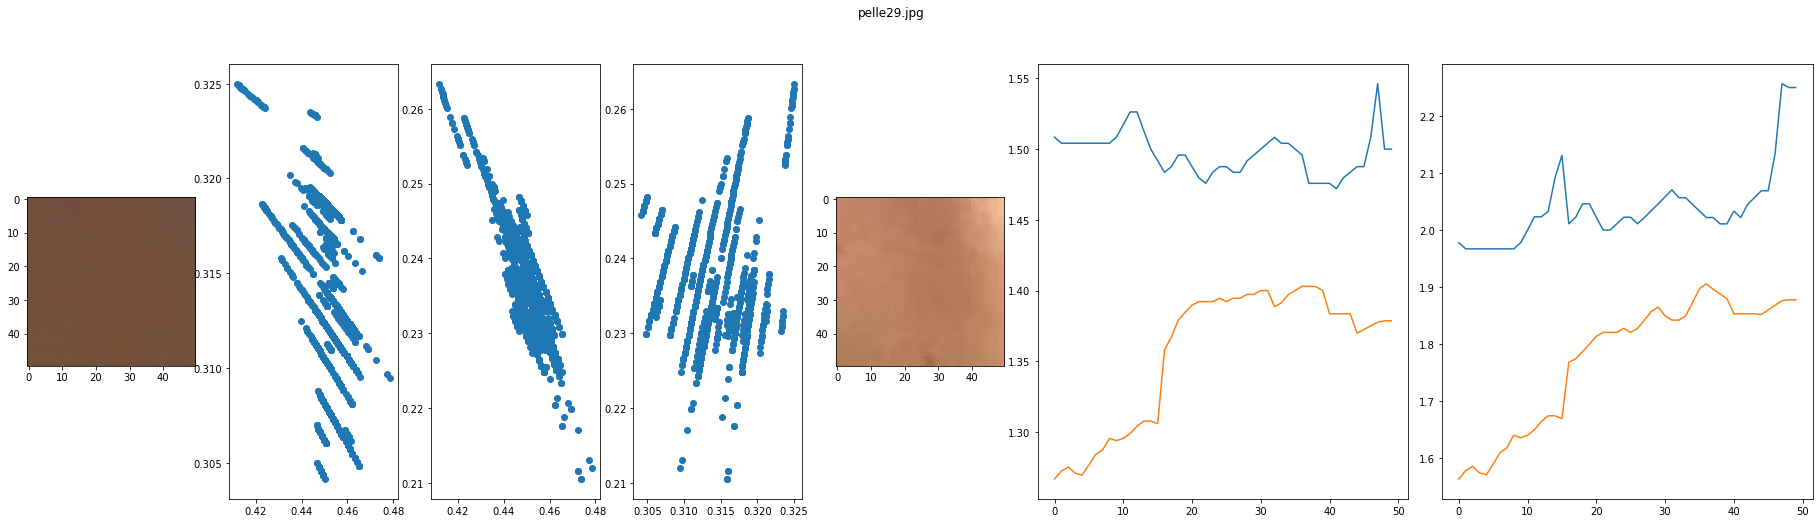

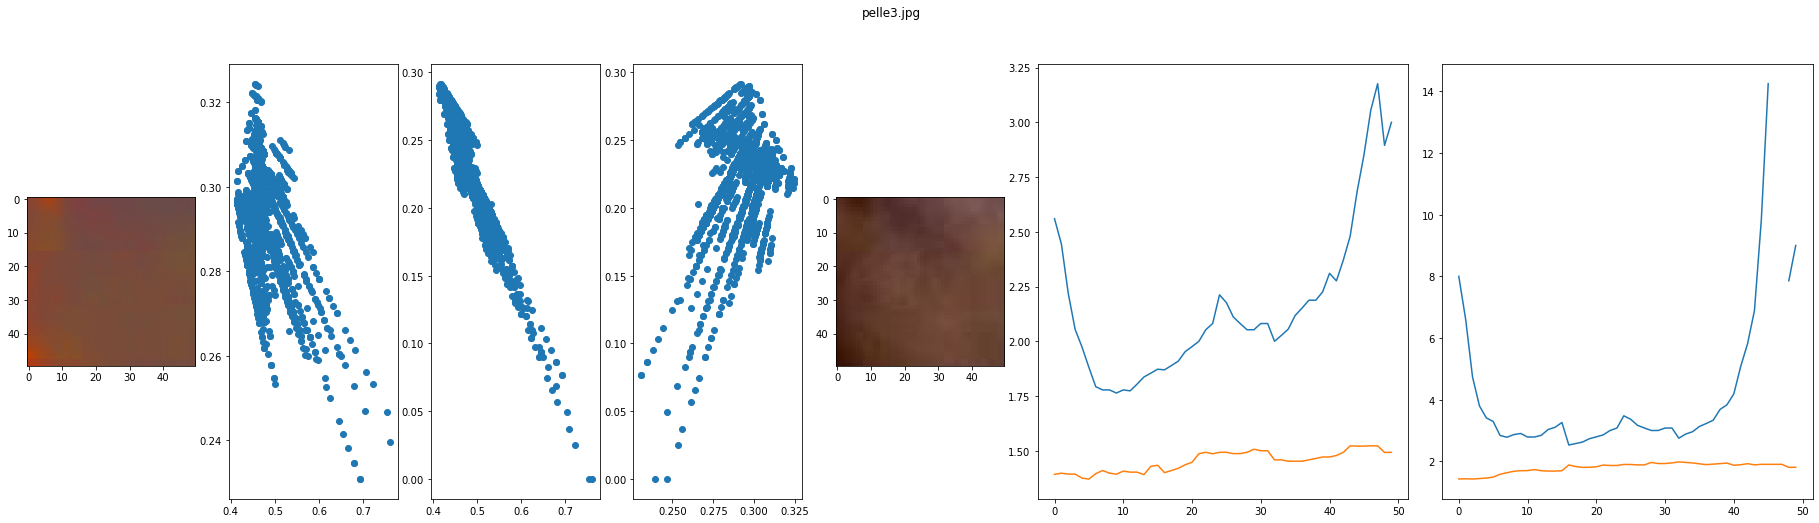

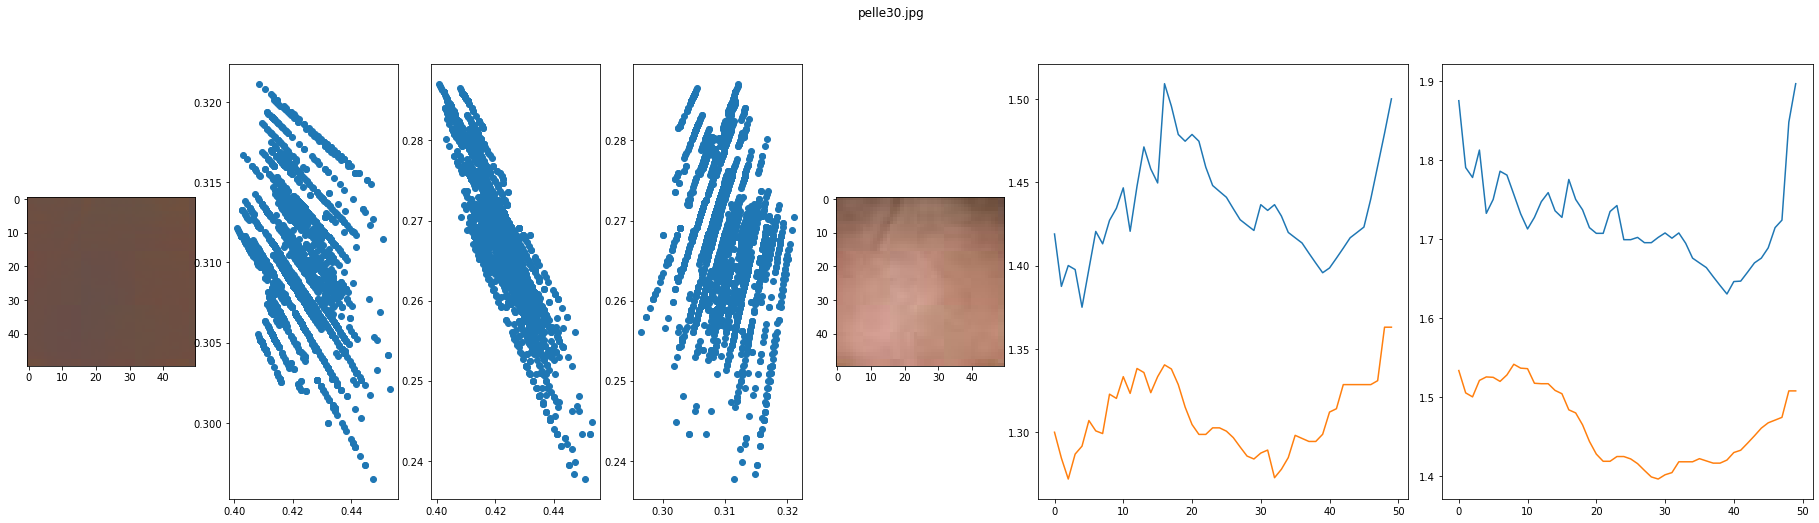

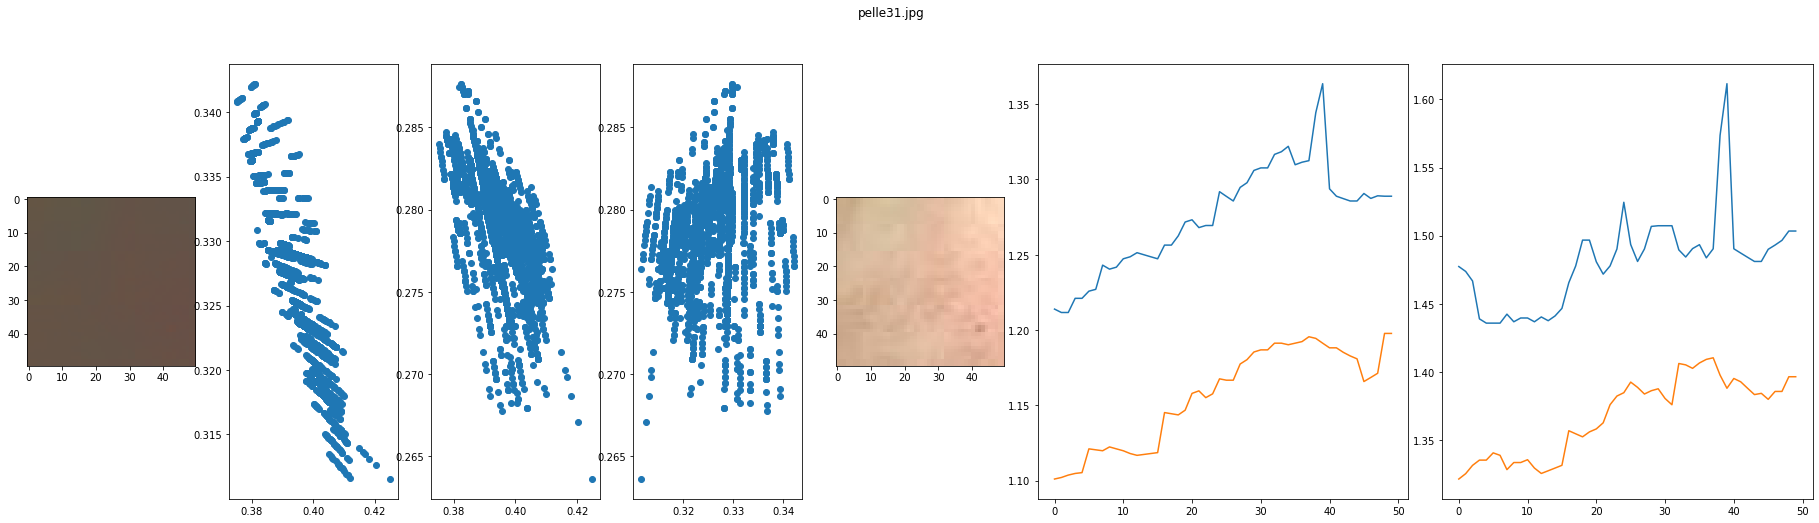

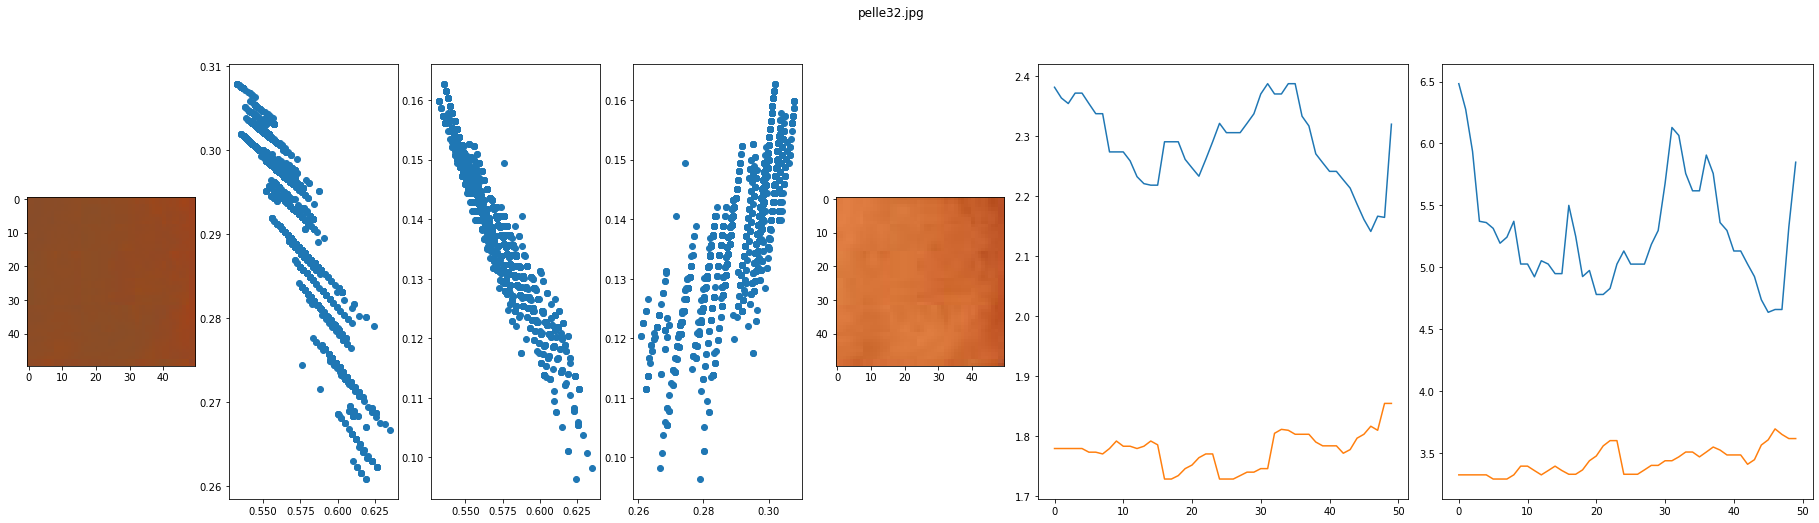

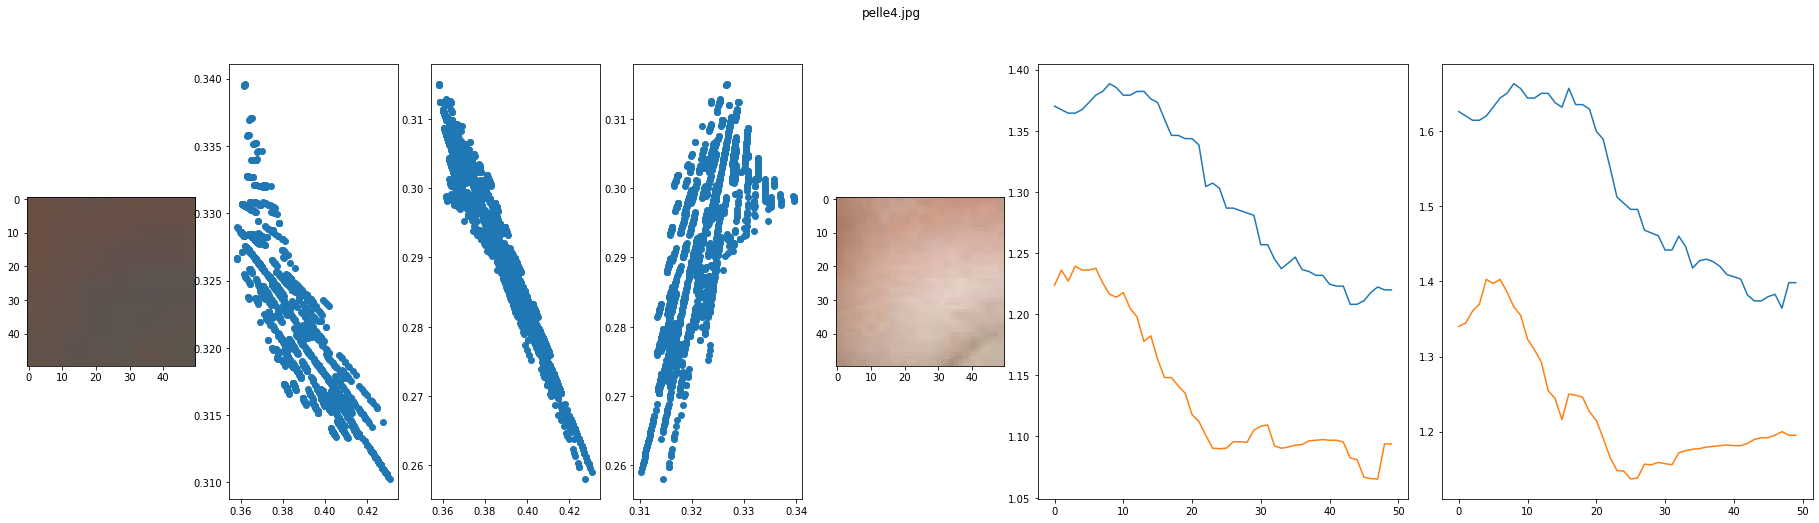

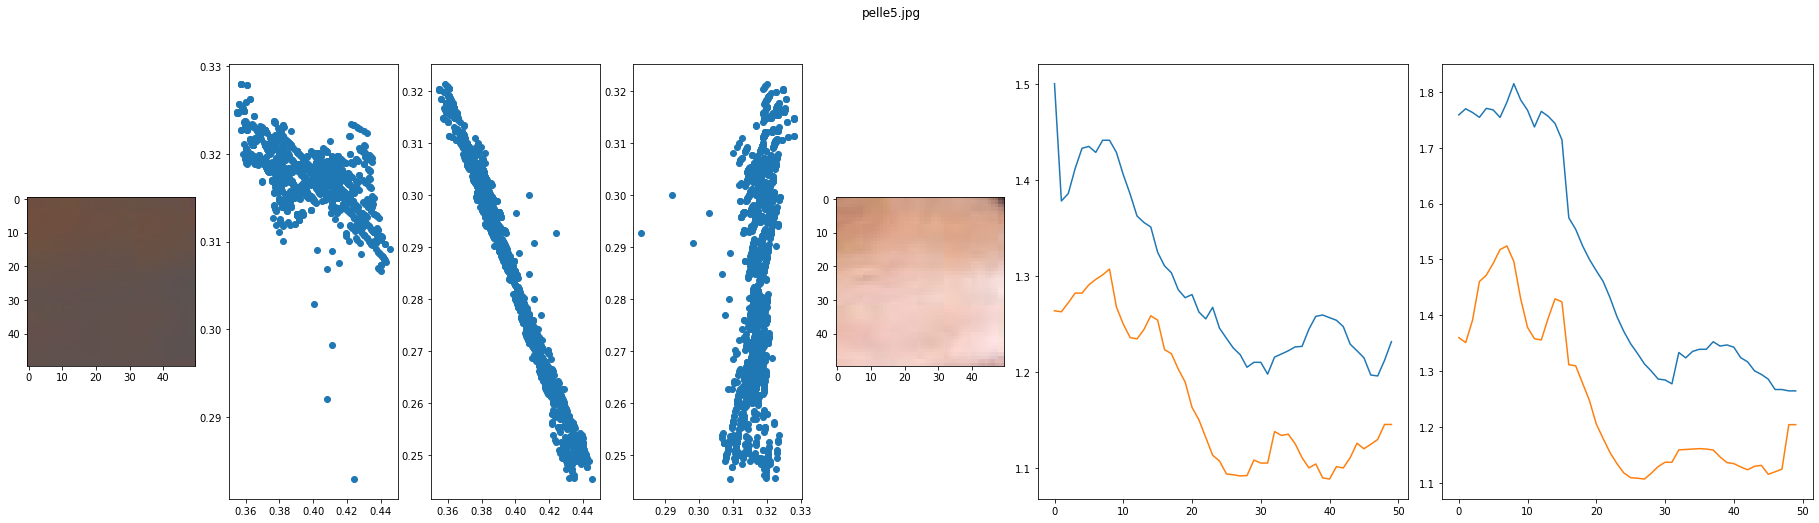

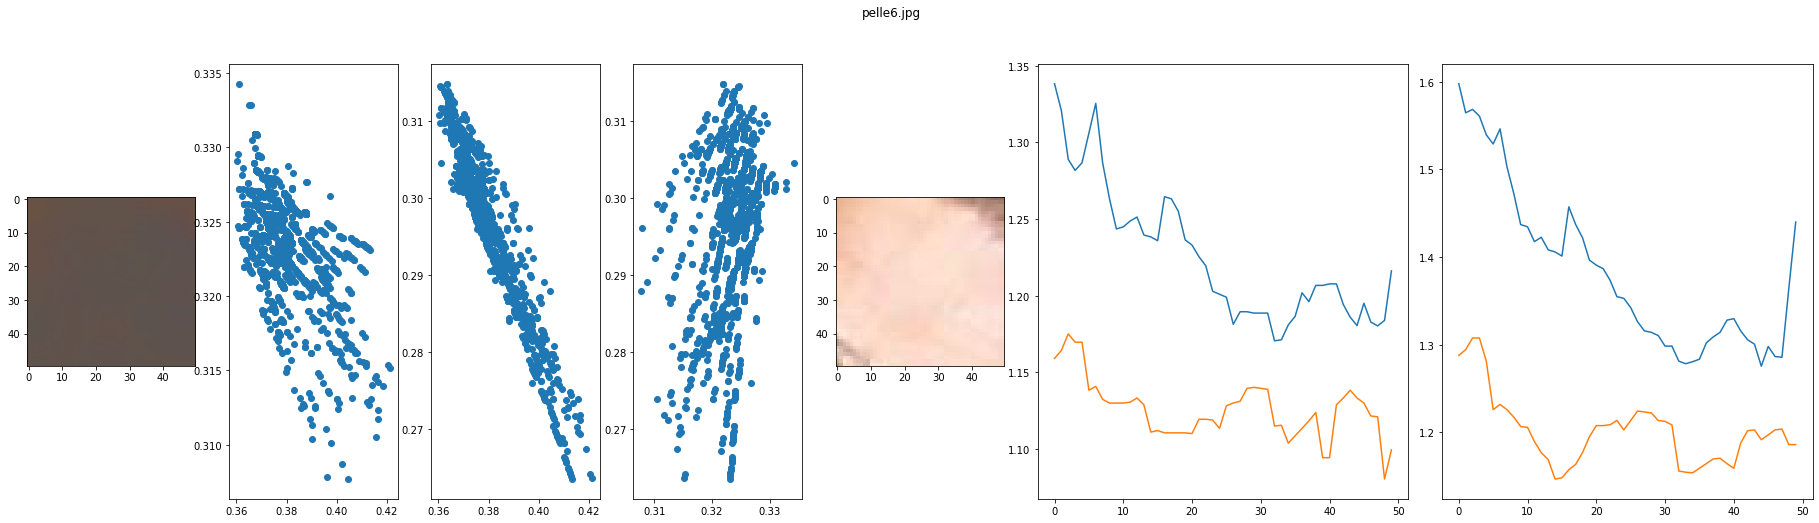

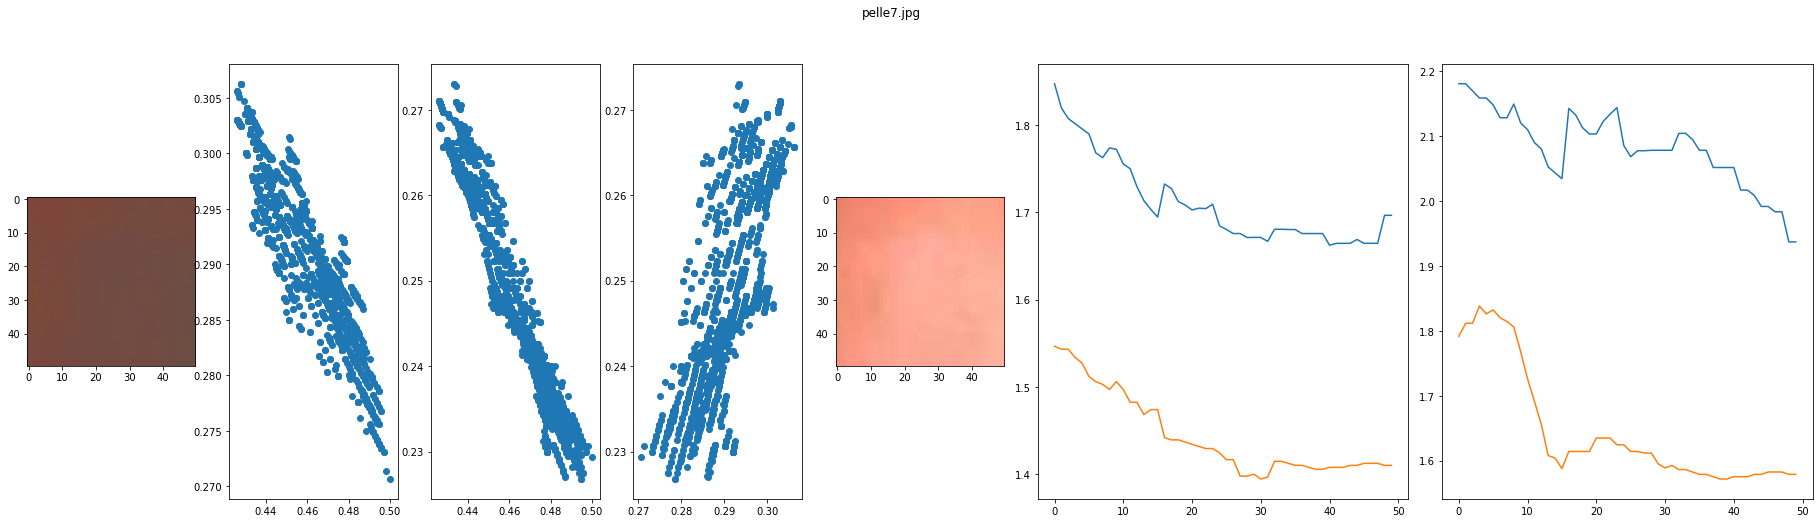

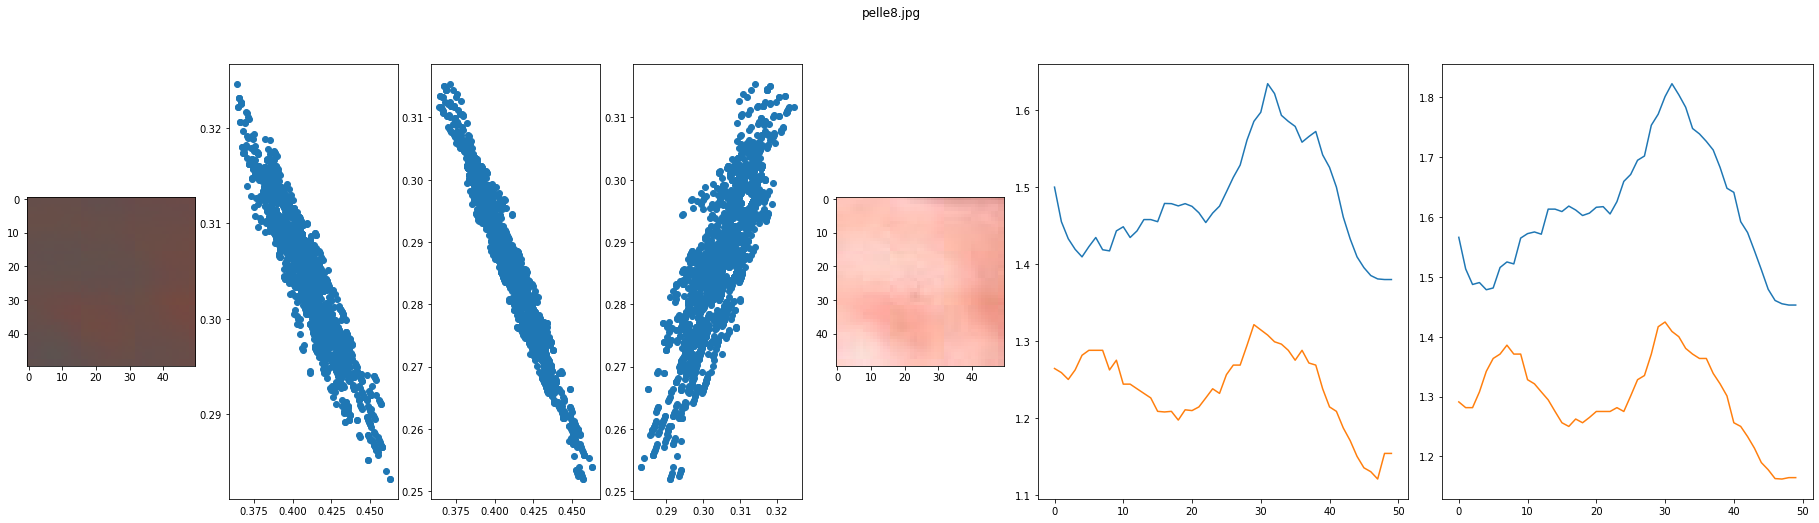

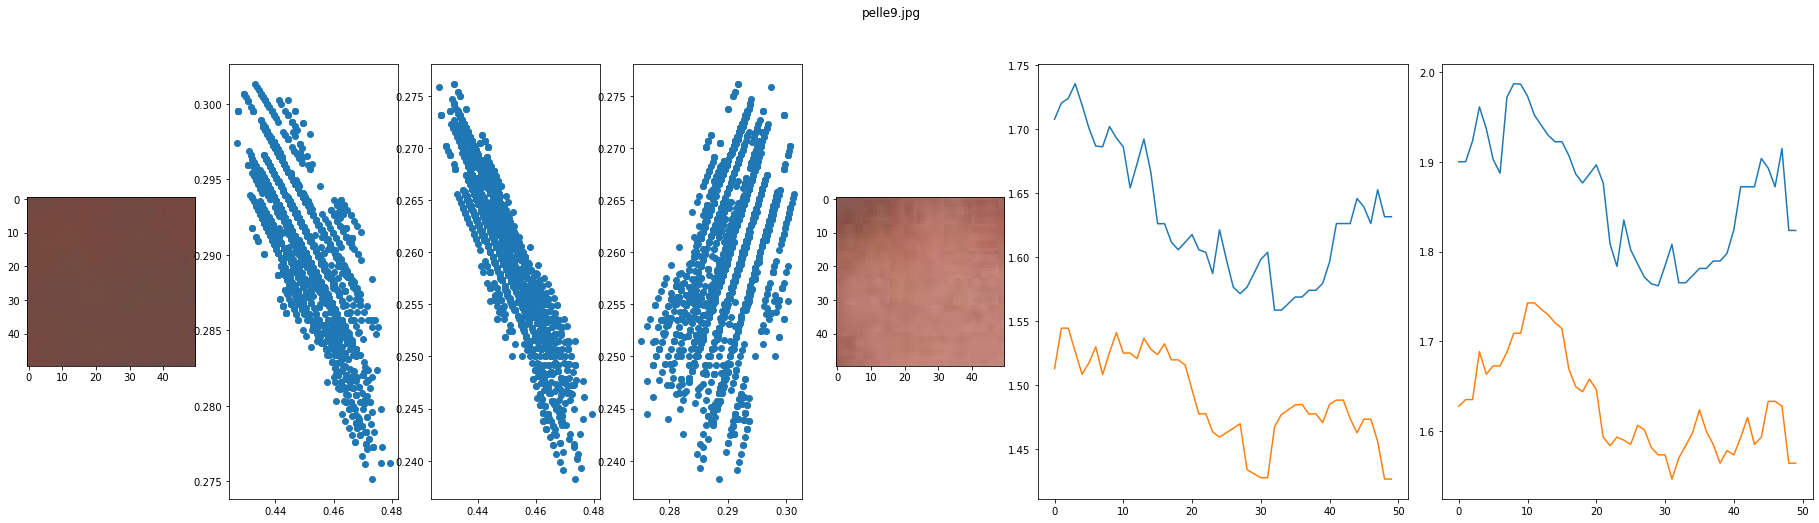

In [108]:
#run_skin_analysis_norm()